## Machine Learning applied to the study of criminal data

### We import the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

### We load the data into a Pandas DataFrame (Python)

In [2]:
df = pd.read_csv('csv/complaints_with_errors.csv')

#### We start data cleaning, removing structurally impactful entries and normalizing those that, only in context, pose an issue

In [3]:
df = df.dropna(subset=['complaints_count'])
df['complaints_count'] = pd.to_numeric(df['complaints_count'], errors='coerce').fillna(0).astype(int)

In [4]:
df = df.dropna(subset=['date'])

In [5]:
df.loc[df['crime_type'].isnull() | (df['crime_type'] == 'error'), 'crime_type'] = 'N/A'

In [6]:
df.loc[df['location'].isnull() | (df['location'] == 'error'), 'location'] = 'N/A'

In [7]:
df['victim_age'] = pd.to_numeric(df['victim_age'], errors='coerce').fillna(0).astype(int)

In [8]:
df.loc[df['victim_gender'].isnull() | ~df['victim_gender'].isin(['F', 'M']), 'victim_gender'] = 'N/A'

In [9]:
df.rename(columns={'time_of_day': 'time_period'}, inplace=True)
df.loc[df['time_period'].isnull() | ~df['time_period'].isin(['morning', 'afternoon', 'night', 'dawn']), 'time_period'] = 'N/A'

In [10]:
df.loc[df['day_of_week'].isnull() | ~df['day_of_week'].isin(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']), 'day_of_week'] = 'N/A'

In [11]:
df['month'] = pd.to_numeric(df['month'], errors='coerce').fillna(0).astype(int)

In [12]:
df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)

In [13]:
df.to_csv('csv/complaints_normalized.csv', index=False)

#### We plot the data to gain a better understanding and visualize potential uncorrected errors

['serious injuries' 'vehicle theft' 'pirate robbery' 'robbery' 'theft'
 'armed robbery' 'vandalism' 'minor injuries']


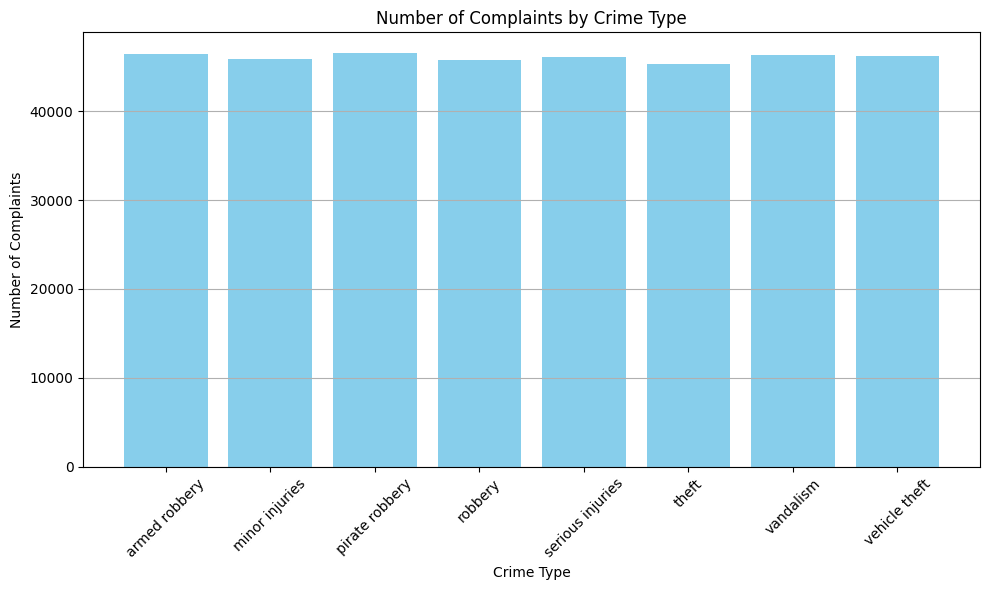

In [14]:
df = pd.read_csv('csv/complaints_normalized.csv')

df = df[df['crime_type'] != 'N/A'].dropna()
crime_types = df['crime_type'].unique()
print(crime_types)

df_plot = df.groupby('crime_type')['complaints_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df_plot['crime_type'], df_plot['complaints_count'], color='skyblue')
plt.xlabel('Crime Type')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints by Crime Type')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

['serious injuries' 'robbery' 'minor injuries' 'vehicle theft' 'vandalism'
 'pirate robbery' 'theft' 'armed robbery']


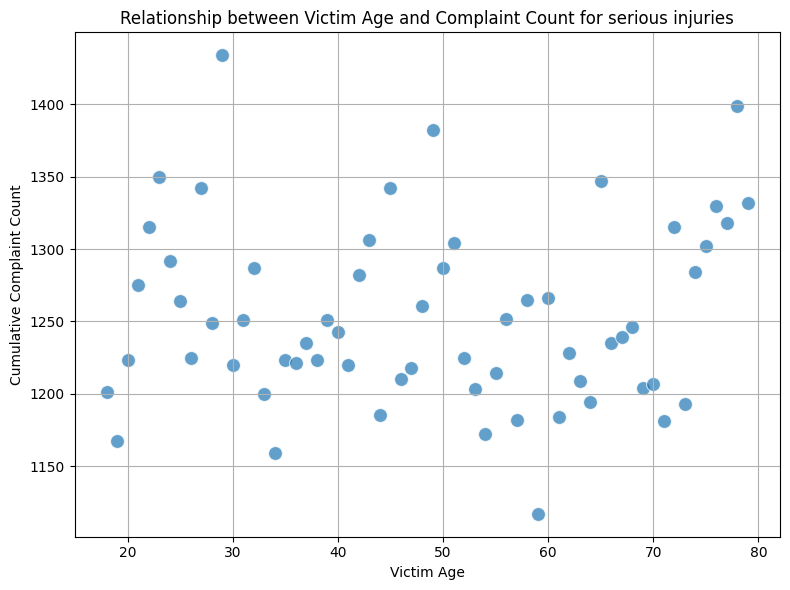

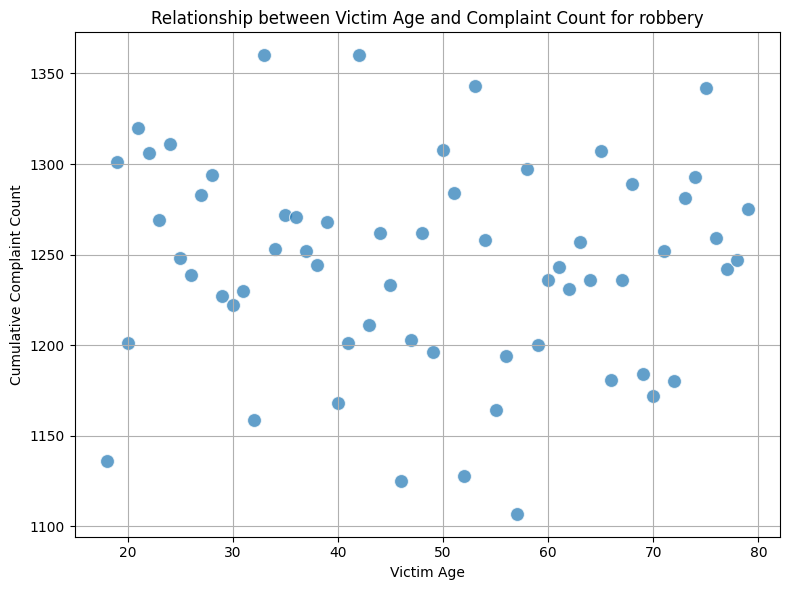

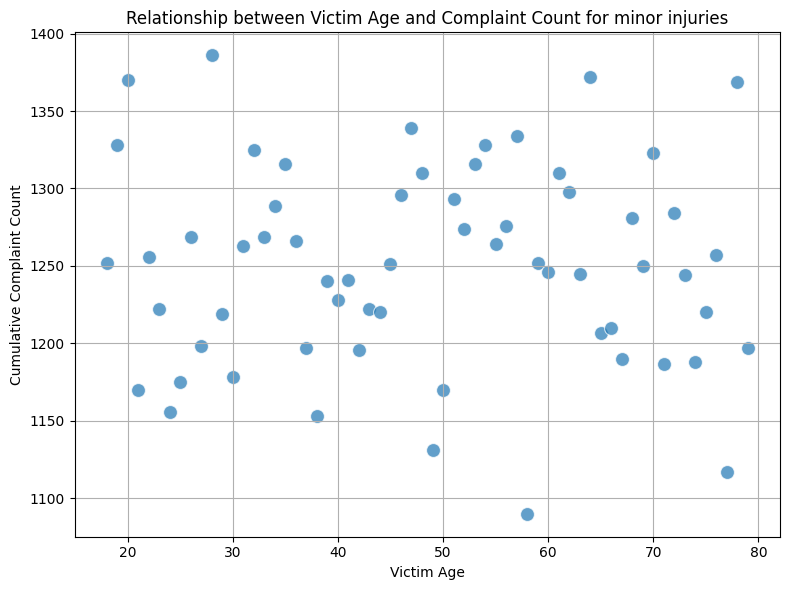

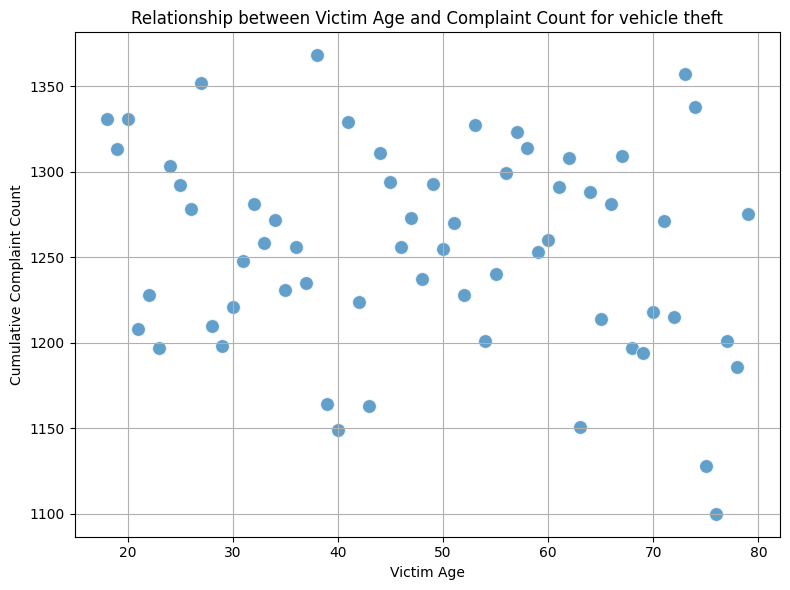

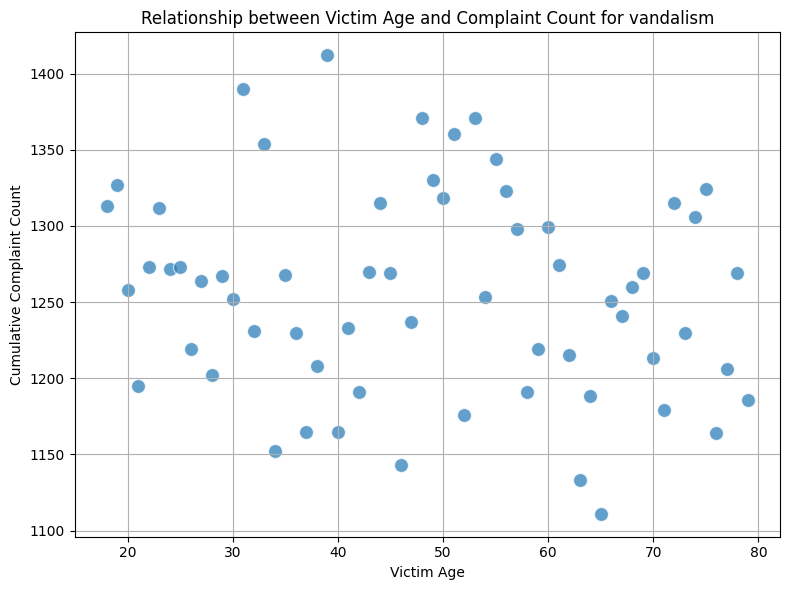

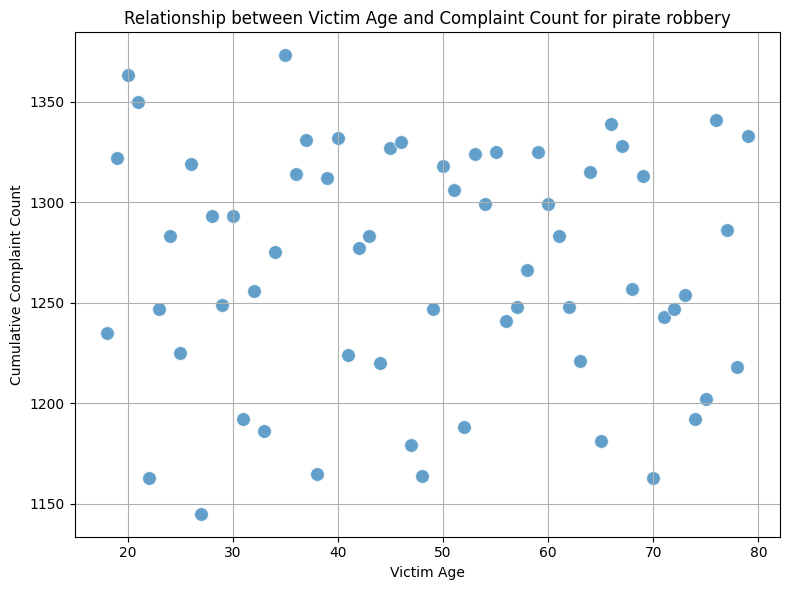

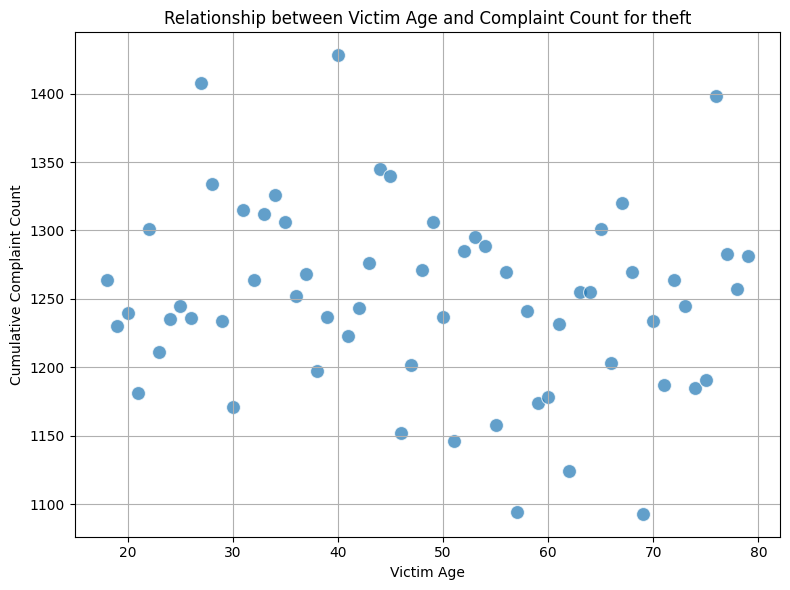

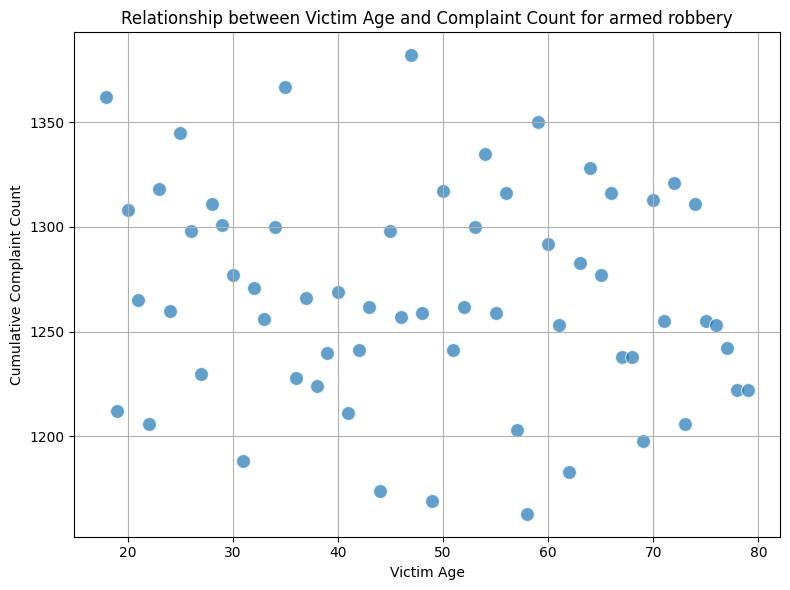

In [15]:
df = pd.read_csv('csv/complaints_normalized.csv')

df = df[df['crime_type'] != 'N/A']
df = df[df['victim_age'] != 0]
df = df[df['complaints_count'] != 0]

crime_types = df['crime_type'].dropna().unique()
print(crime_types)

for crime_type in crime_types:
    plt.figure(figsize=(8, 6))
    df_crime_type = df[df['crime_type'] == crime_type]
    df_crime_type = df_crime_type.groupby('victim_age')['complaints_count'].sum().reset_index()
    sns.scatterplot(data=df_crime_type, x='victim_age', y='complaints_count', alpha=0.7, s=100)
    plt.xlabel('Victim Age')
    plt.ylabel('Cumulative Complaint Count')
    plt.title(f'Relationship between Victim Age and Complaint Count for {crime_type}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

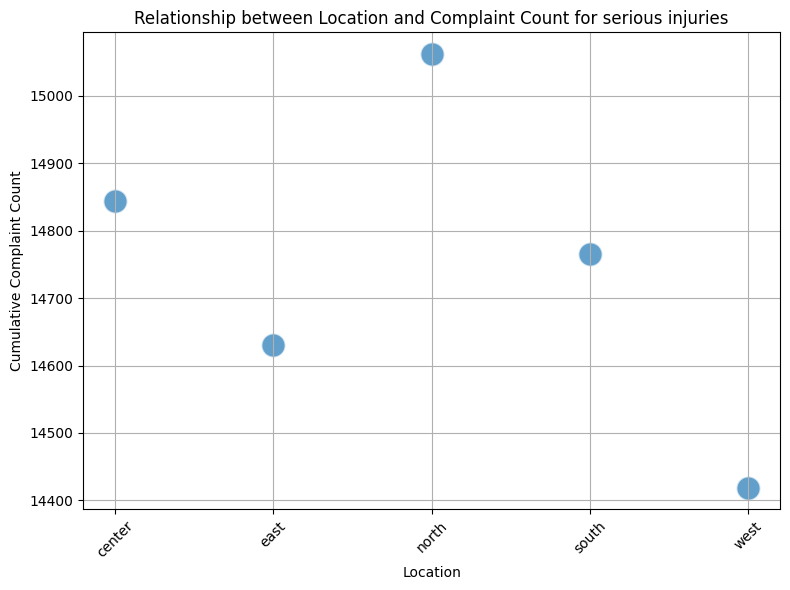

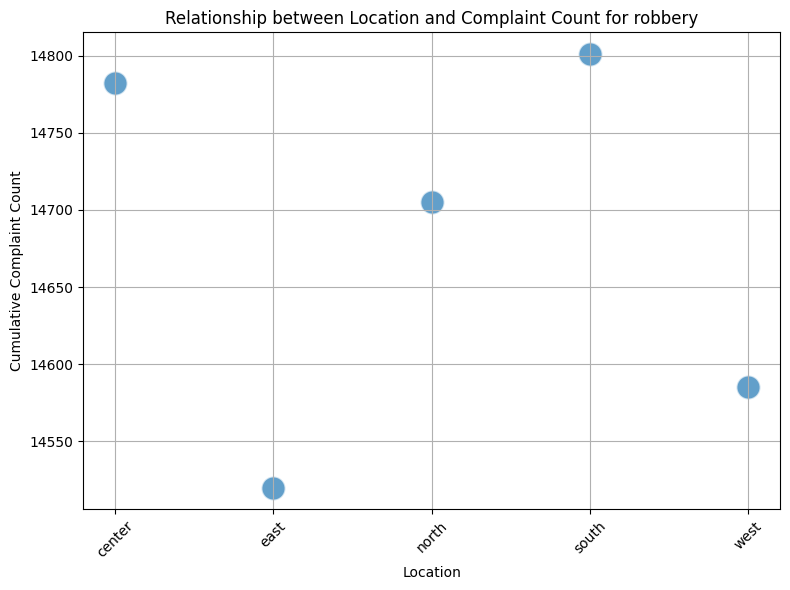

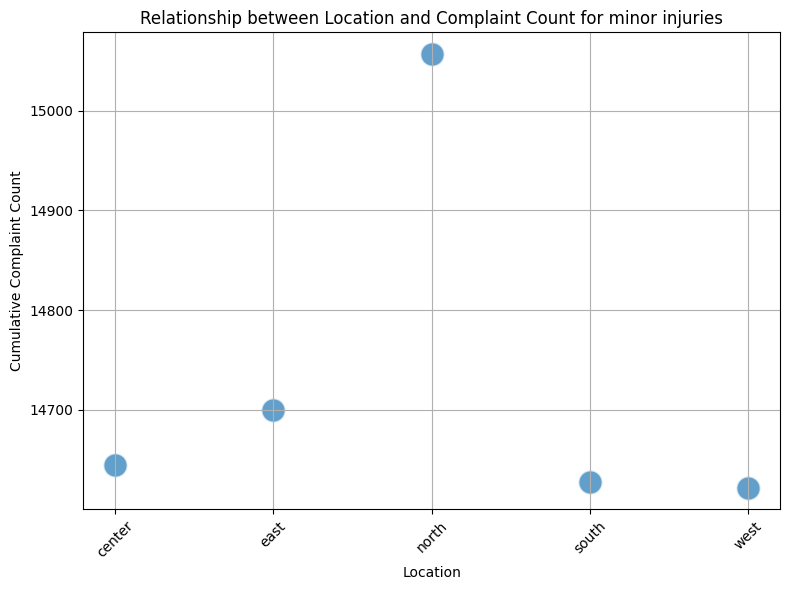

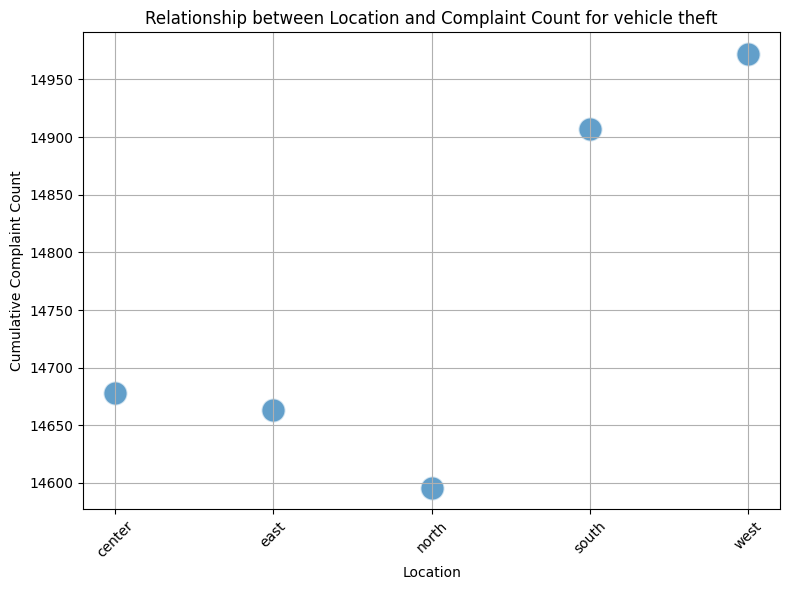

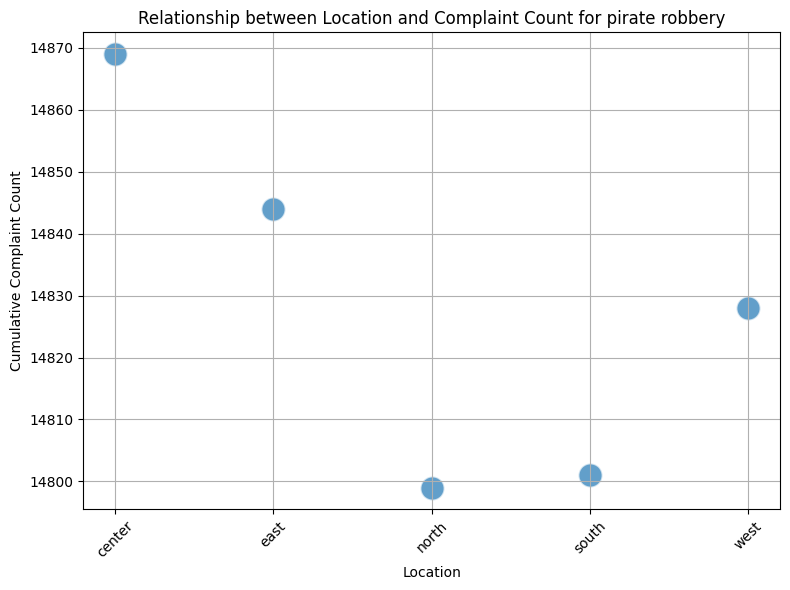

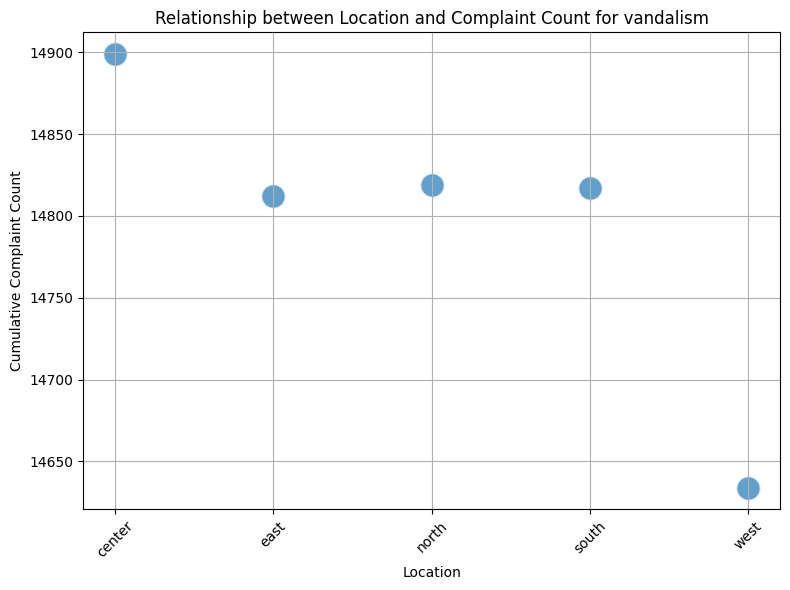

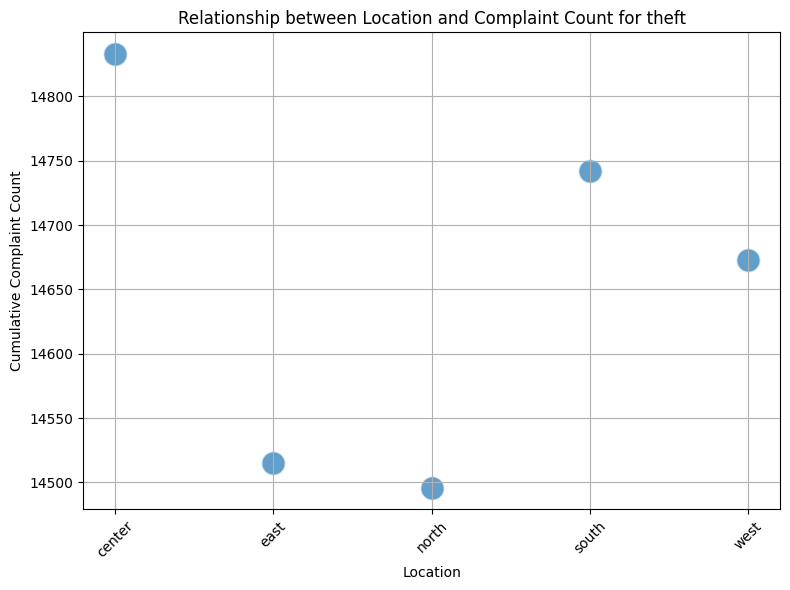

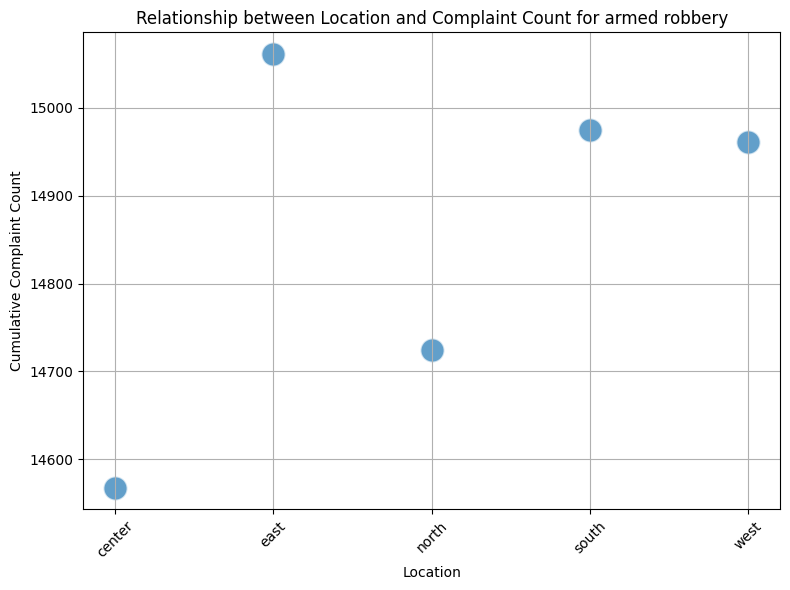

In [16]:
df = pd.read_csv('csv/complaints_normalized.csv')

df = df[(df['crime_type'] != 'N/A') & (df['location'] != 'N/A') & (df['complaints_count'] != 0)]

crime_types = df['crime_type'].dropna().unique()

for crime_type in crime_types:
    plt.figure(figsize=(8, 6))
    df_crime_type = df[df['crime_type'] == crime_type]
    df_crime_type = df_crime_type.groupby('location')['complaints_count'].sum().reset_index()
    sns.scatterplot(data=df_crime_type, x='location', y='complaints_count', alpha=0.7, s=300)
    plt.xlabel('Location')
    plt.ylabel('Cumulative Complaint Count')
    plt.title(f'Relationship between Location and Complaint Count for {crime_type}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

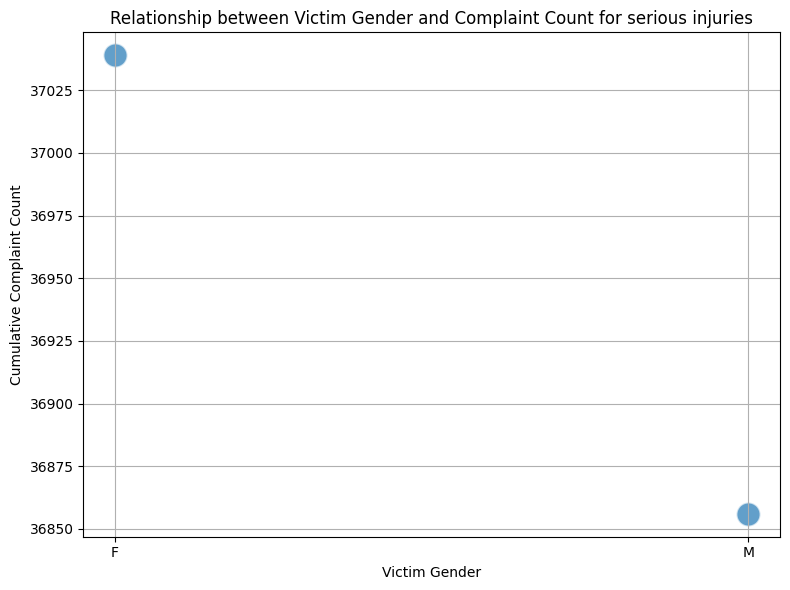

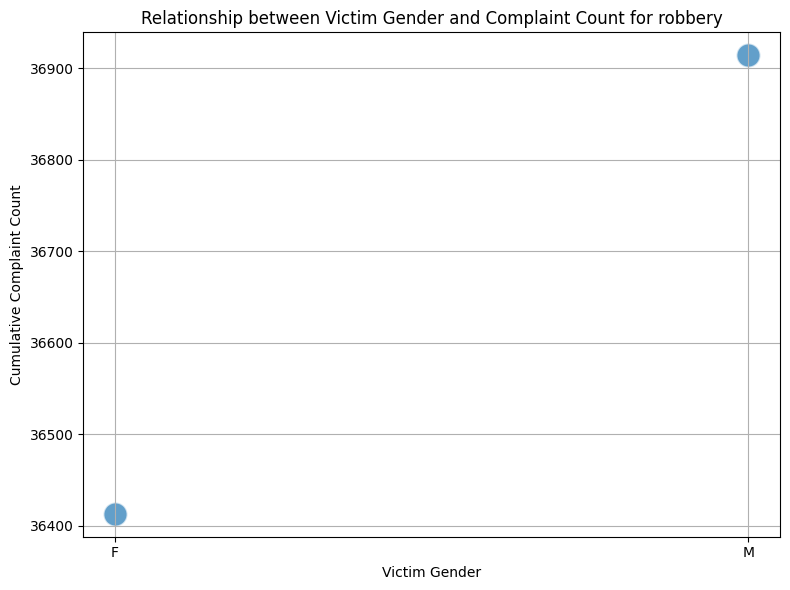

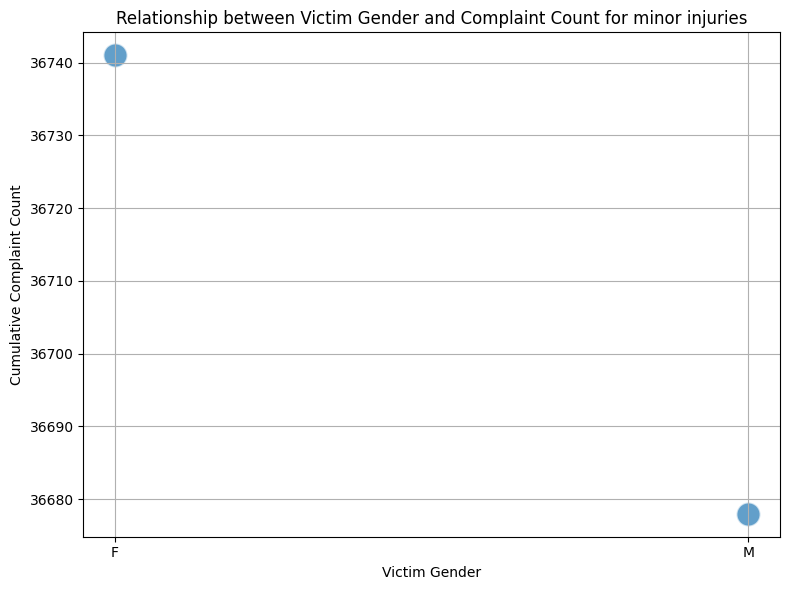

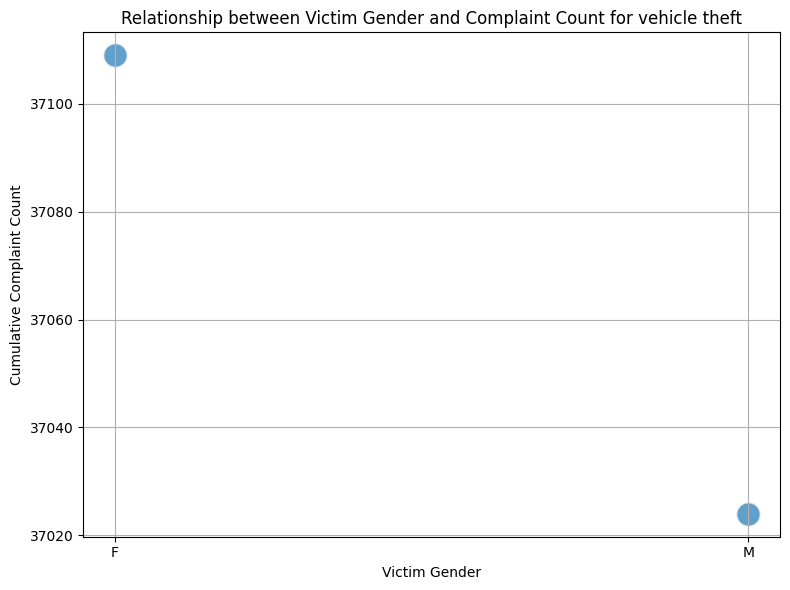

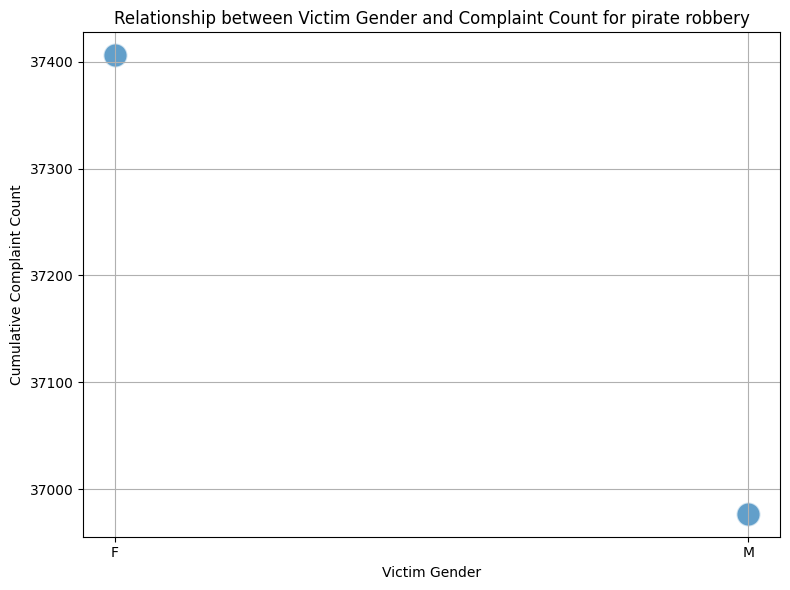

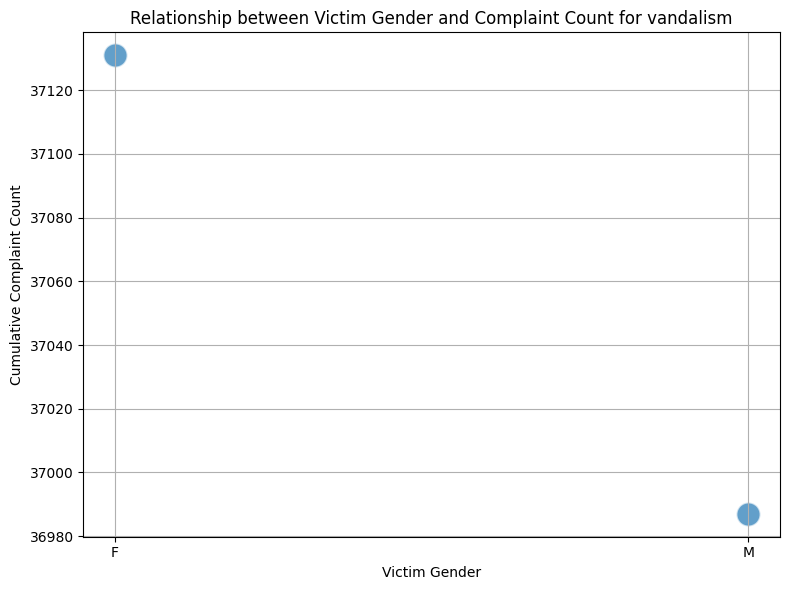

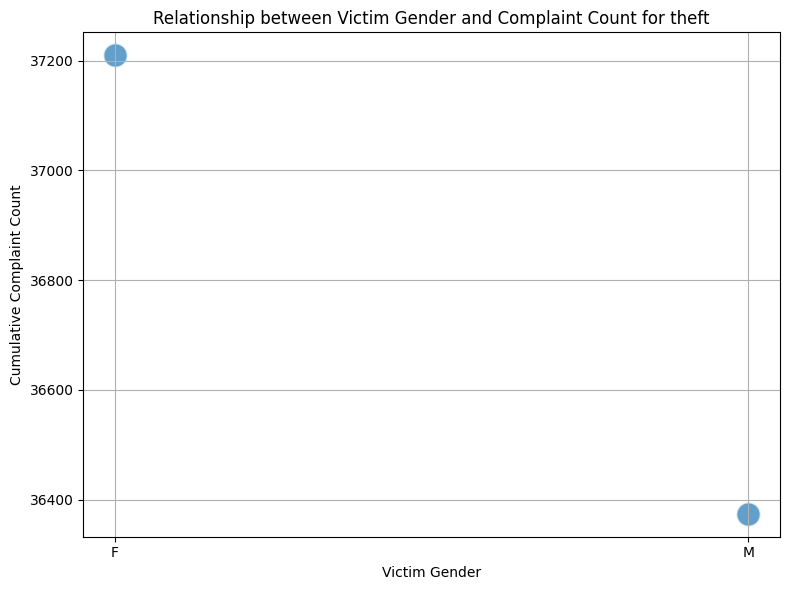

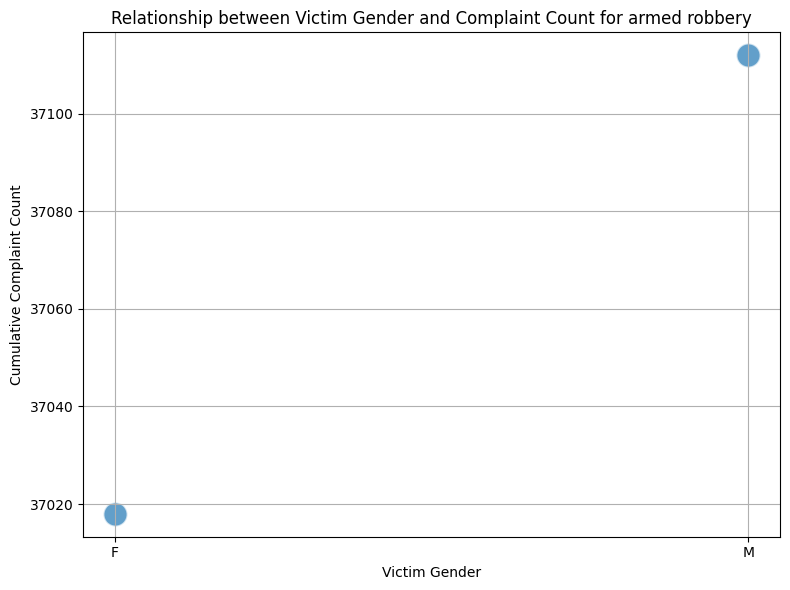

In [17]:
df = pd.read_csv('csv/complaints_normalized.csv')

df = df[(df['crime_type'] != 'N/A') & (df['victim_gender'] != 'N/A') & (df['complaints_count'] != 0)]

crime_types = df['crime_type'].dropna().unique()

for crime_type in crime_types:
    plt.figure(figsize=(8, 6))
    df_crime_type = df[df['crime_type'] == crime_type]
    df_crime_type = df_crime_type.groupby('victim_gender')['complaints_count'].sum().reset_index()
    sns.scatterplot(data=df_crime_type, x='victim_gender', y='complaints_count', alpha=0.7, s=300)
    plt.xlabel('Victim Gender')
    plt.ylabel('Cumulative Complaint Count')
    plt.title(f'Relationship between Victim Gender and Complaint Count for {crime_type}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


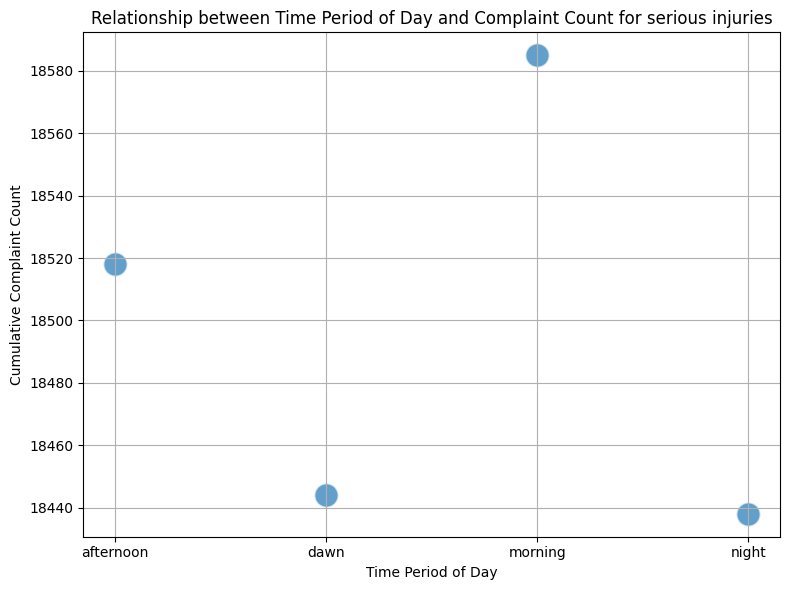

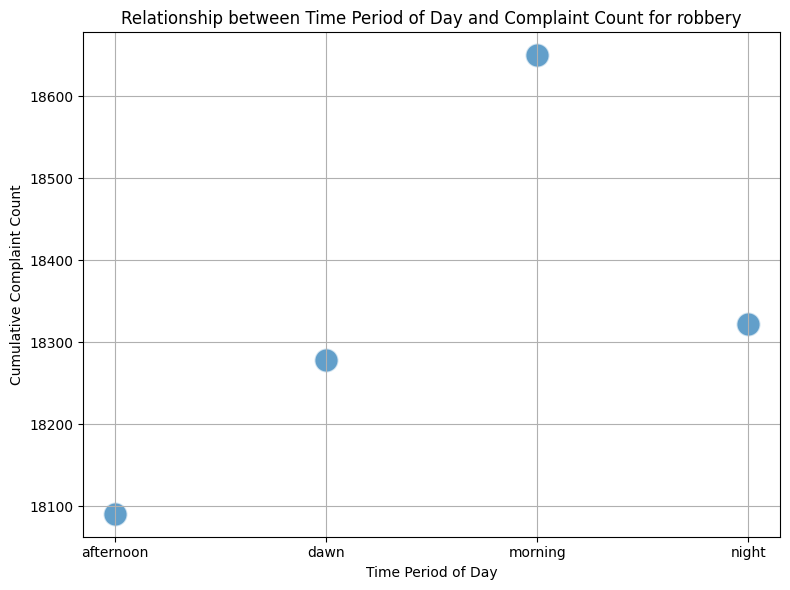

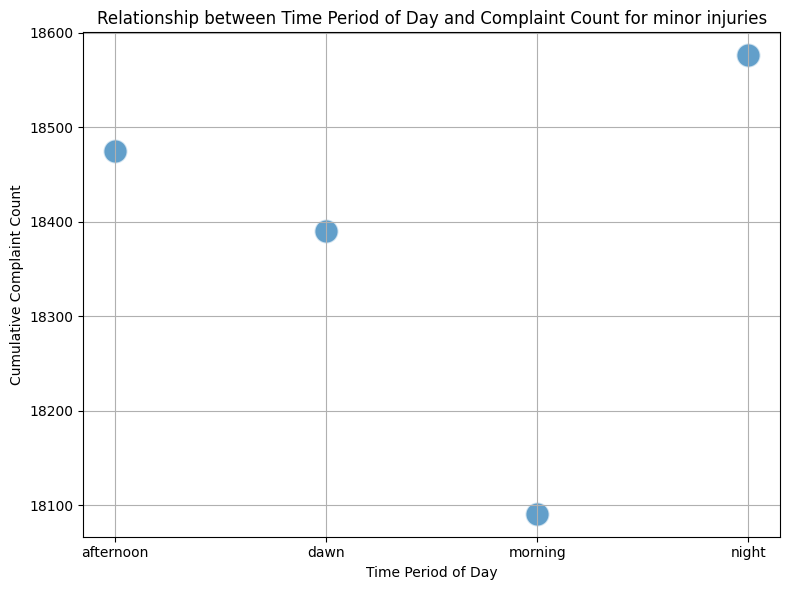

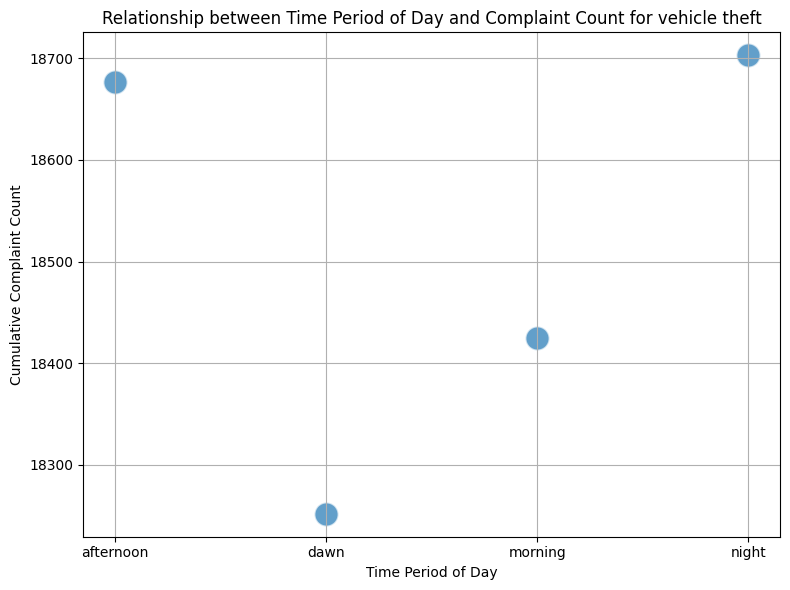

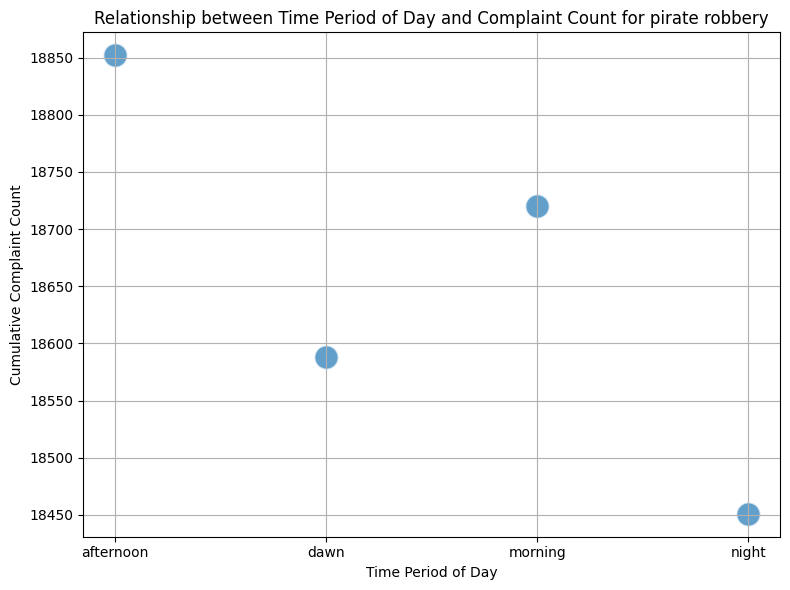

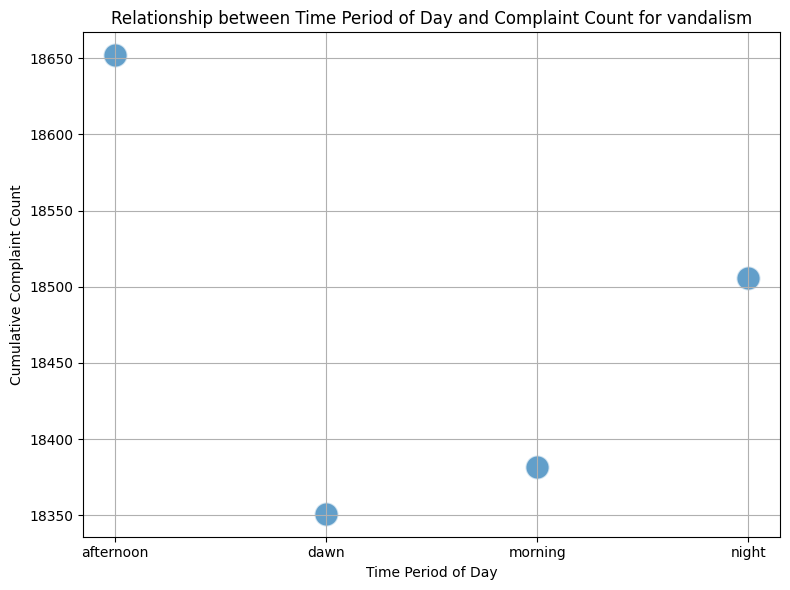

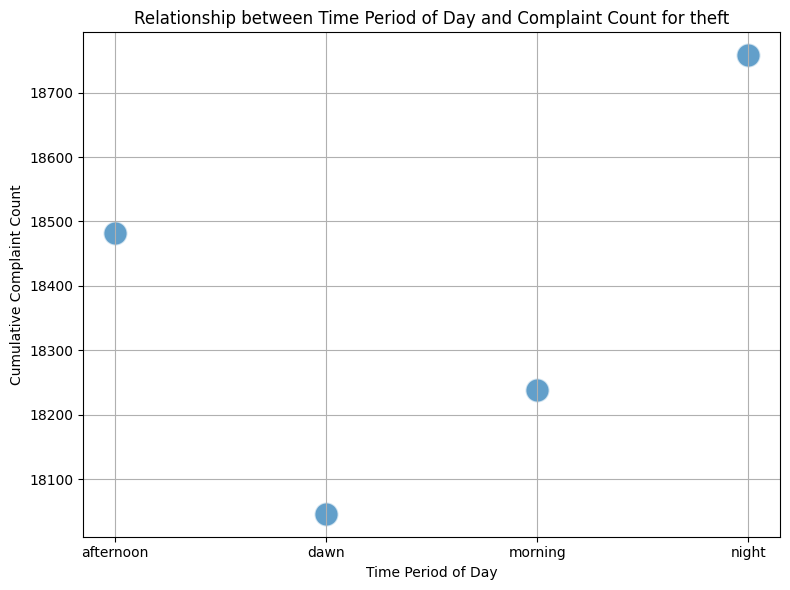

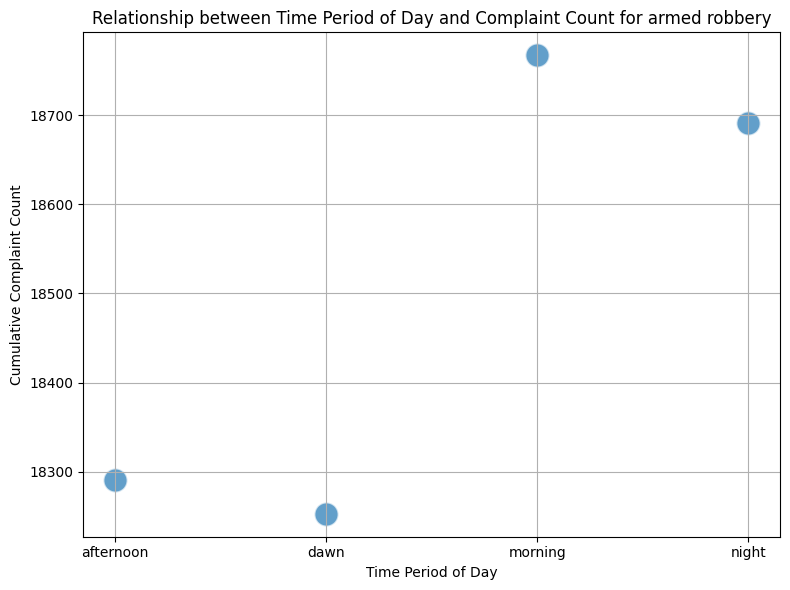

In [18]:
df = pd.read_csv('csv/complaints_normalized.csv')

df = df[(df['crime_type'] != 'N/A') & (df['time_period'] != 'N/A') & (df['complaints_count'] != 0)]

crime_types = df['crime_type'].dropna().unique()

for crime_type in crime_types:
    plt.figure(figsize=(8, 6))
    df_crime_type = df[df['crime_type'] == crime_type]
    df_crime_type = df_crime_type.groupby('time_period')['complaints_count'].sum().reset_index()
    sns.scatterplot(data=df_crime_type, x='time_period', y='complaints_count', alpha=0.7, s=300)
    plt.xlabel('Time Period of Day')
    plt.ylabel('Cumulative Complaint Count')
    plt.title(f'Relationship between Time Period of Day and Complaint Count for {crime_type}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Machine Learning

#### Letting the model reflect the relationships to consider between the data

c:\Users\BL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


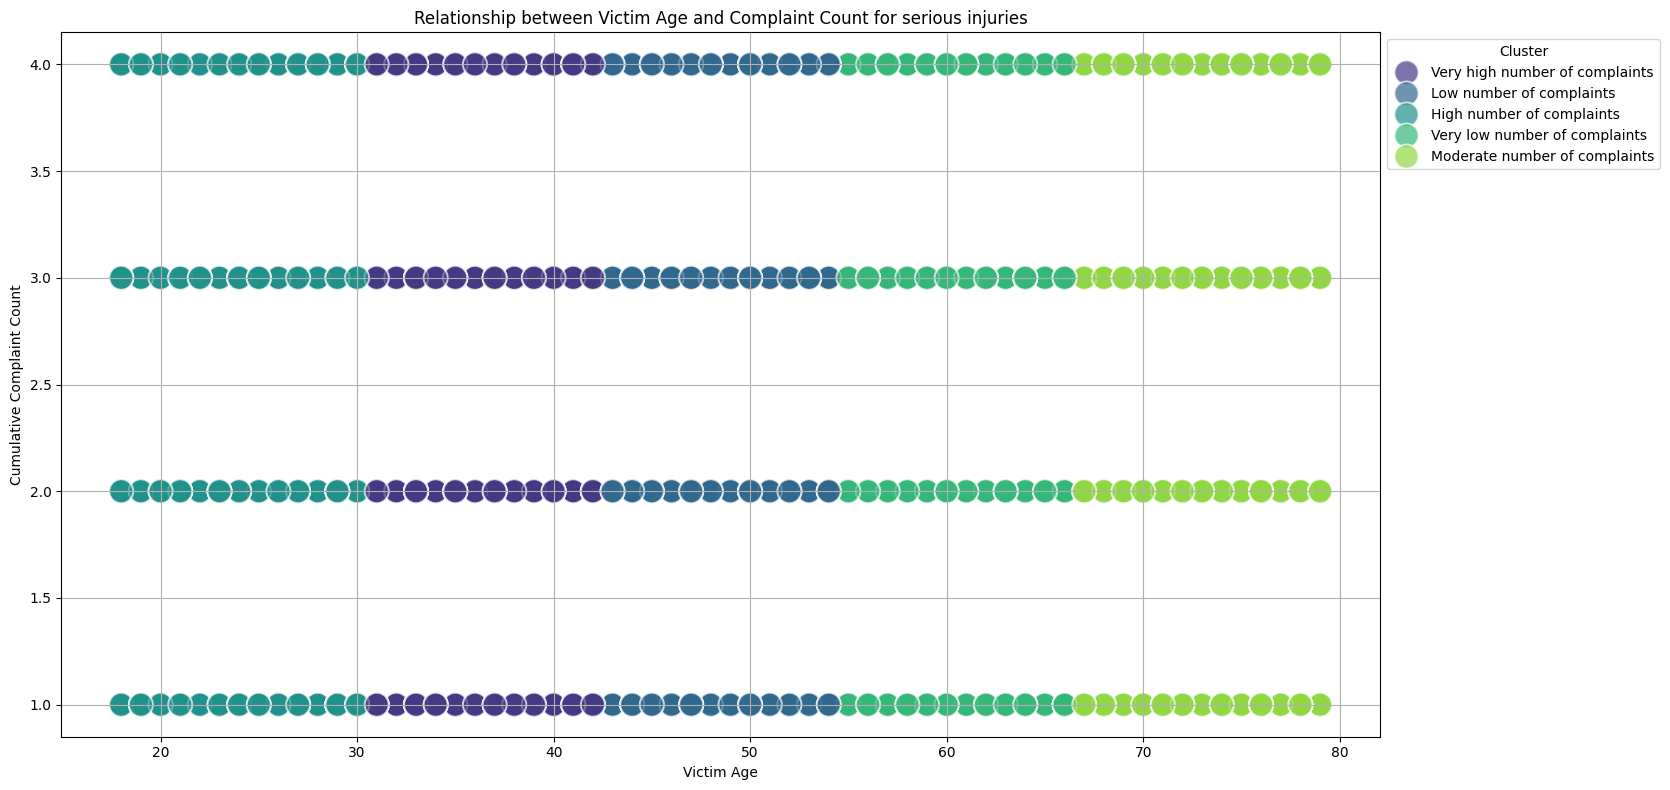

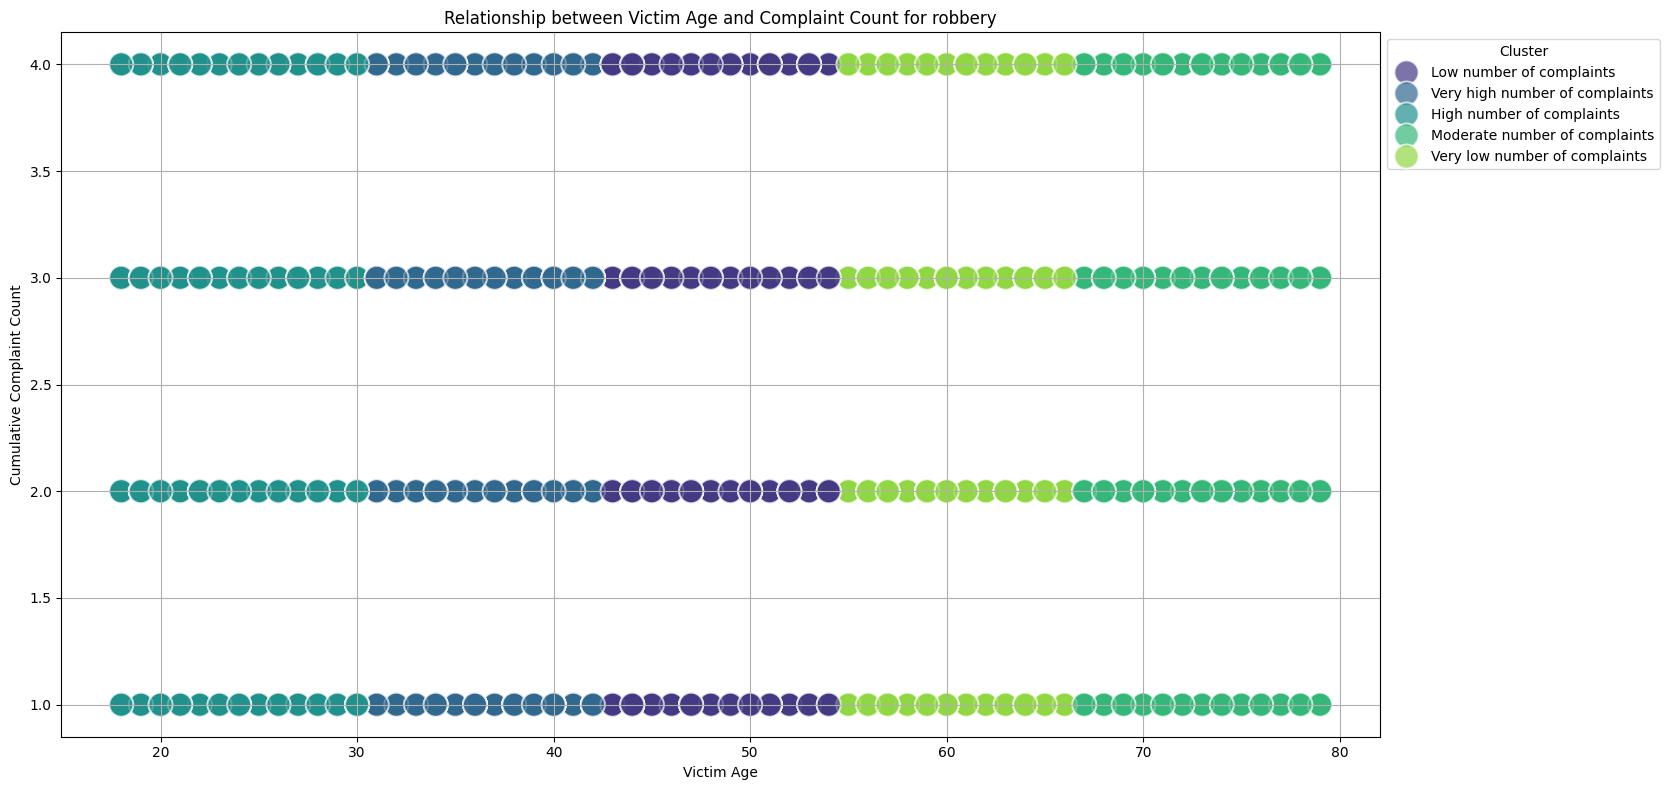

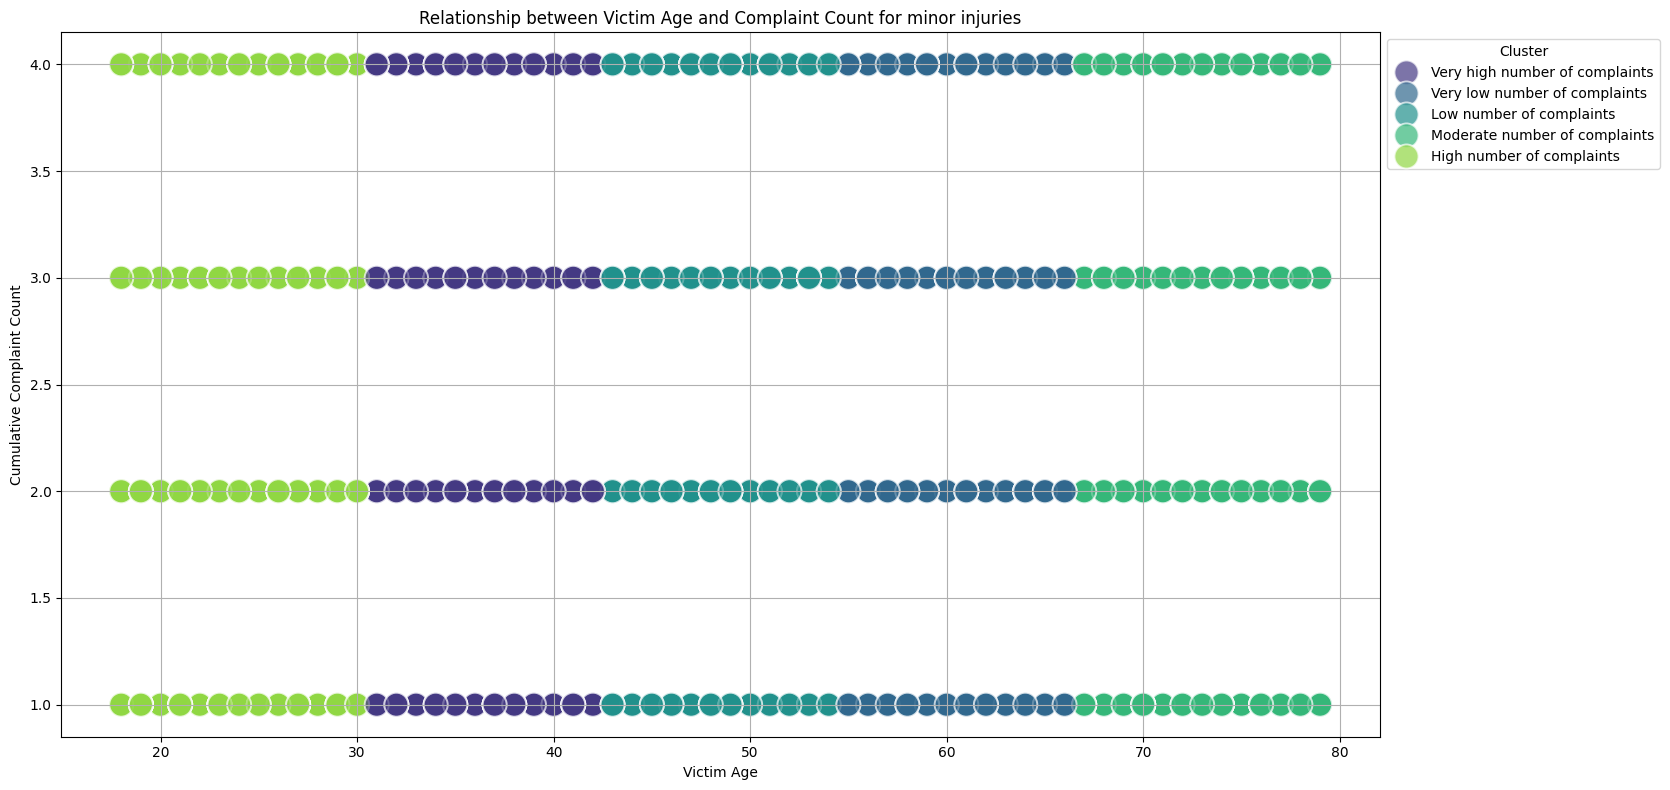

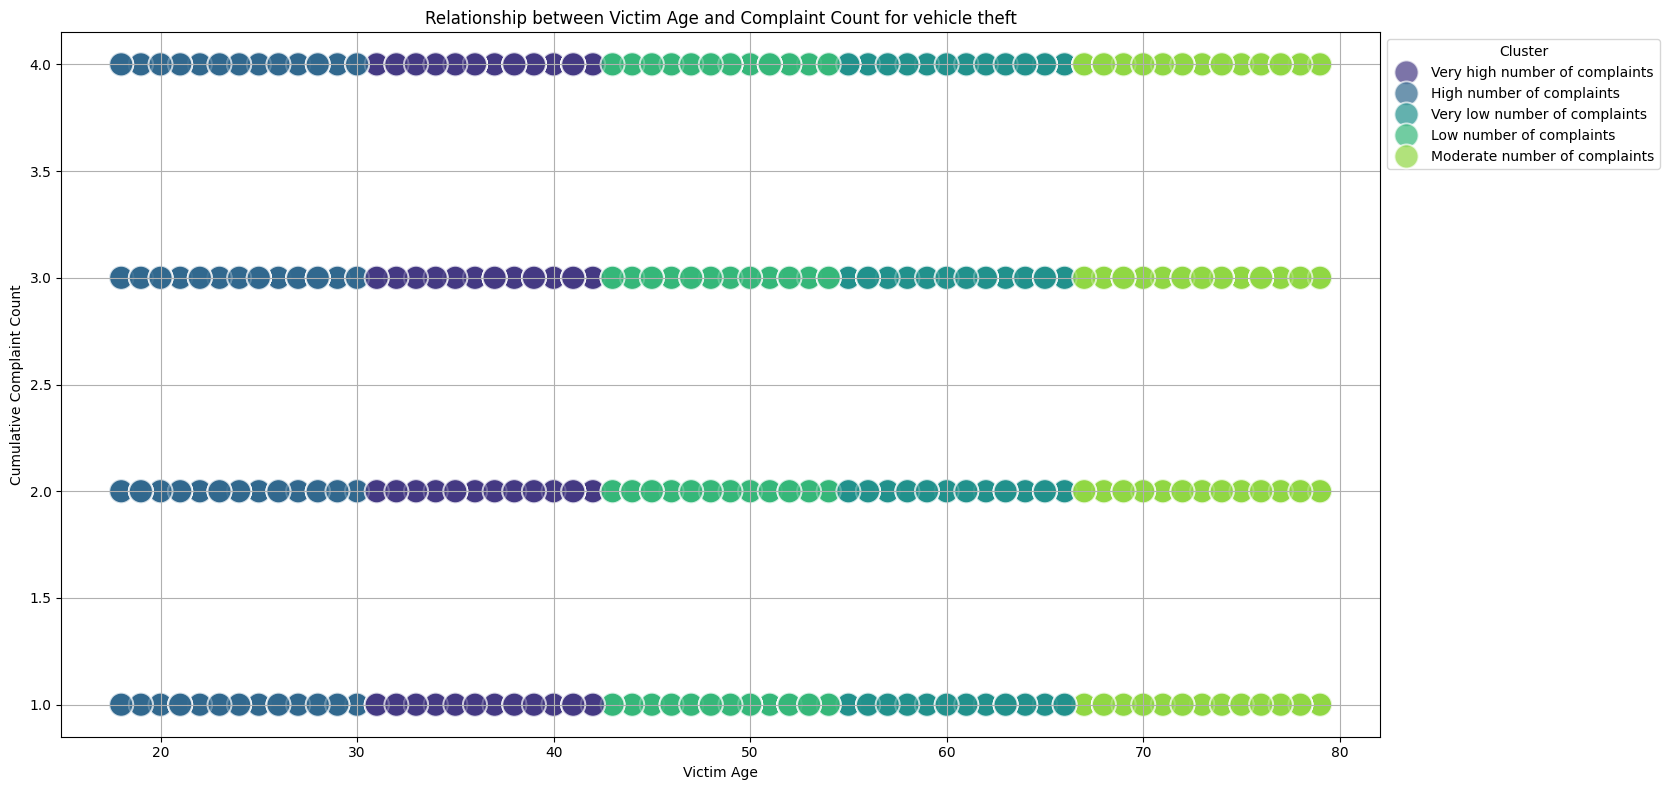

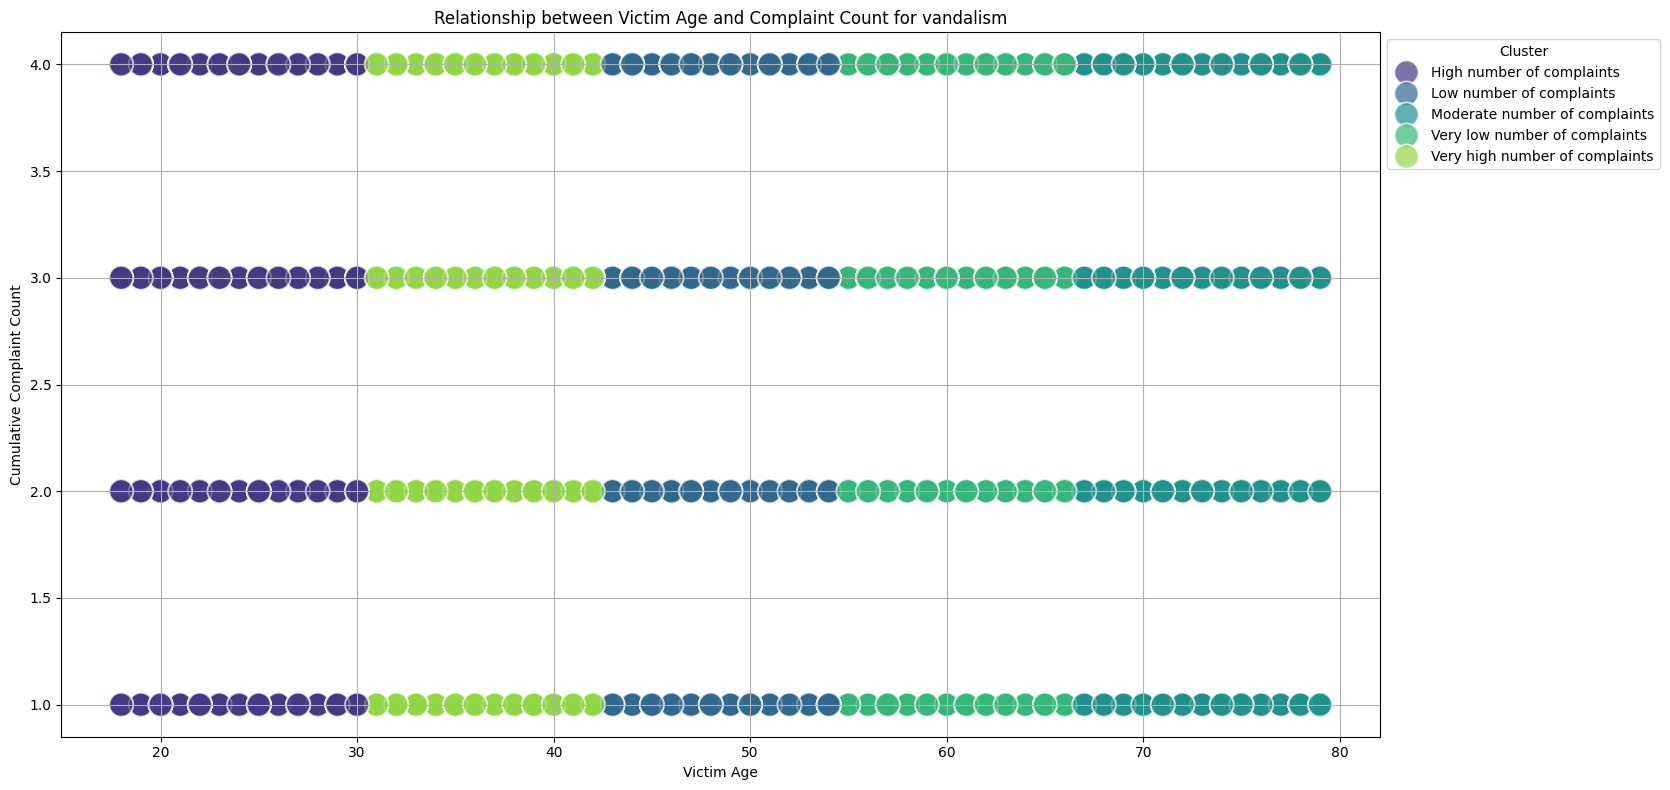

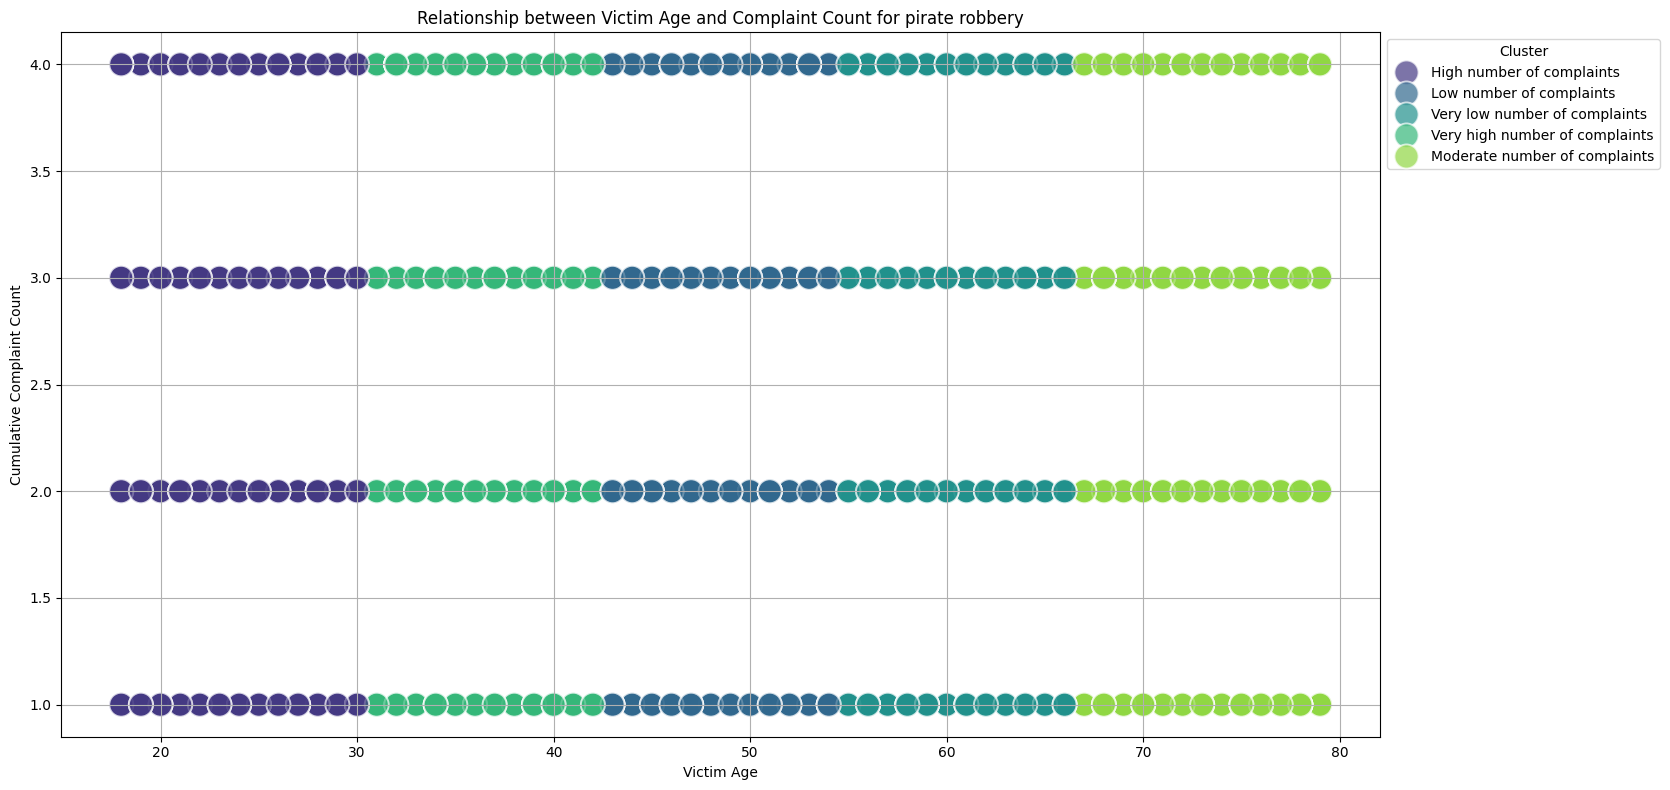

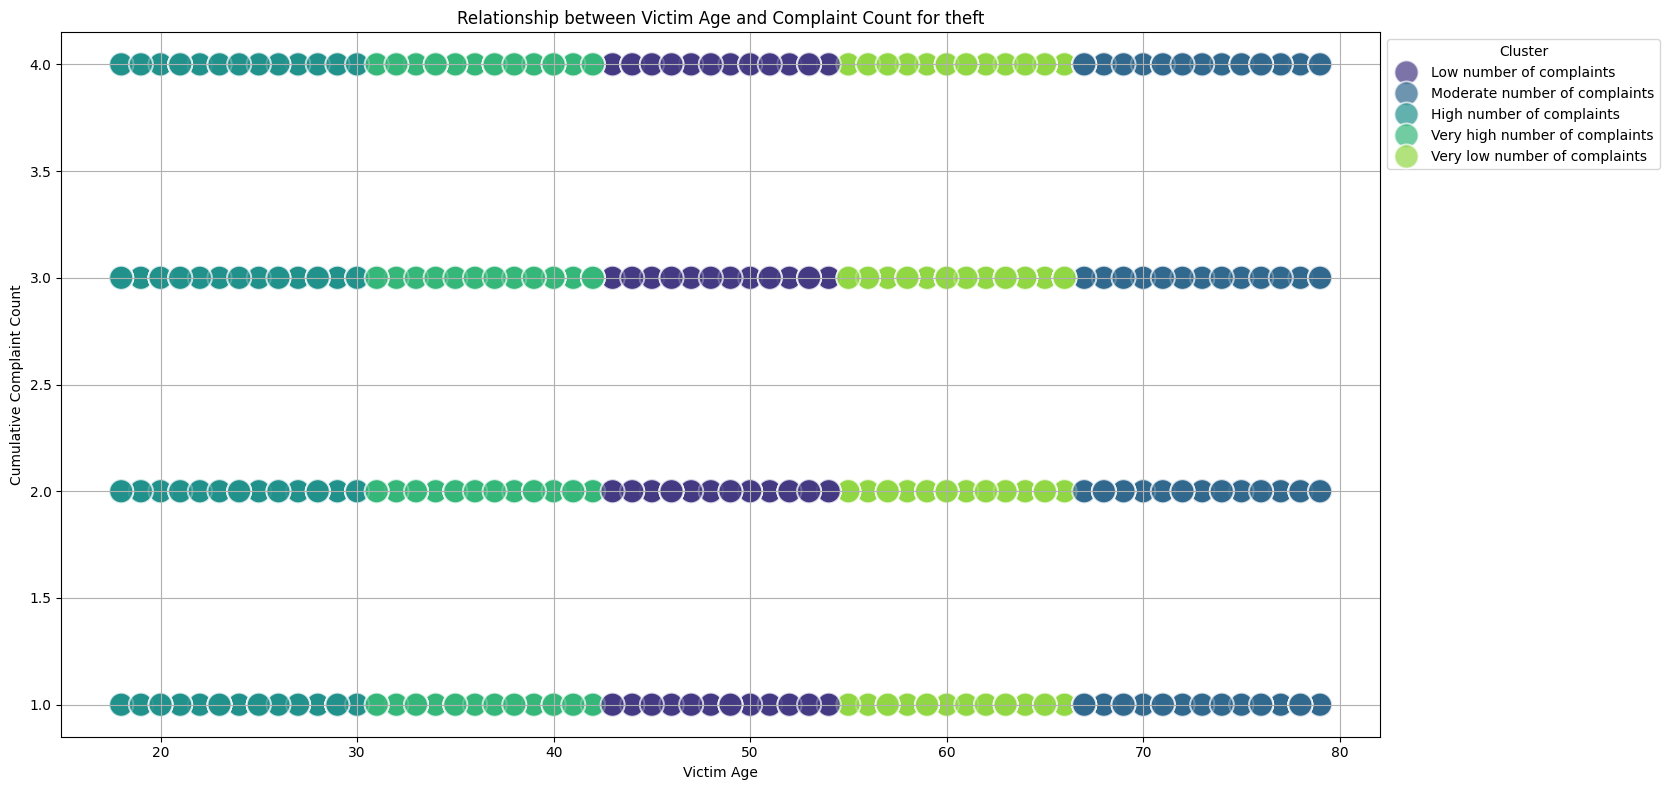

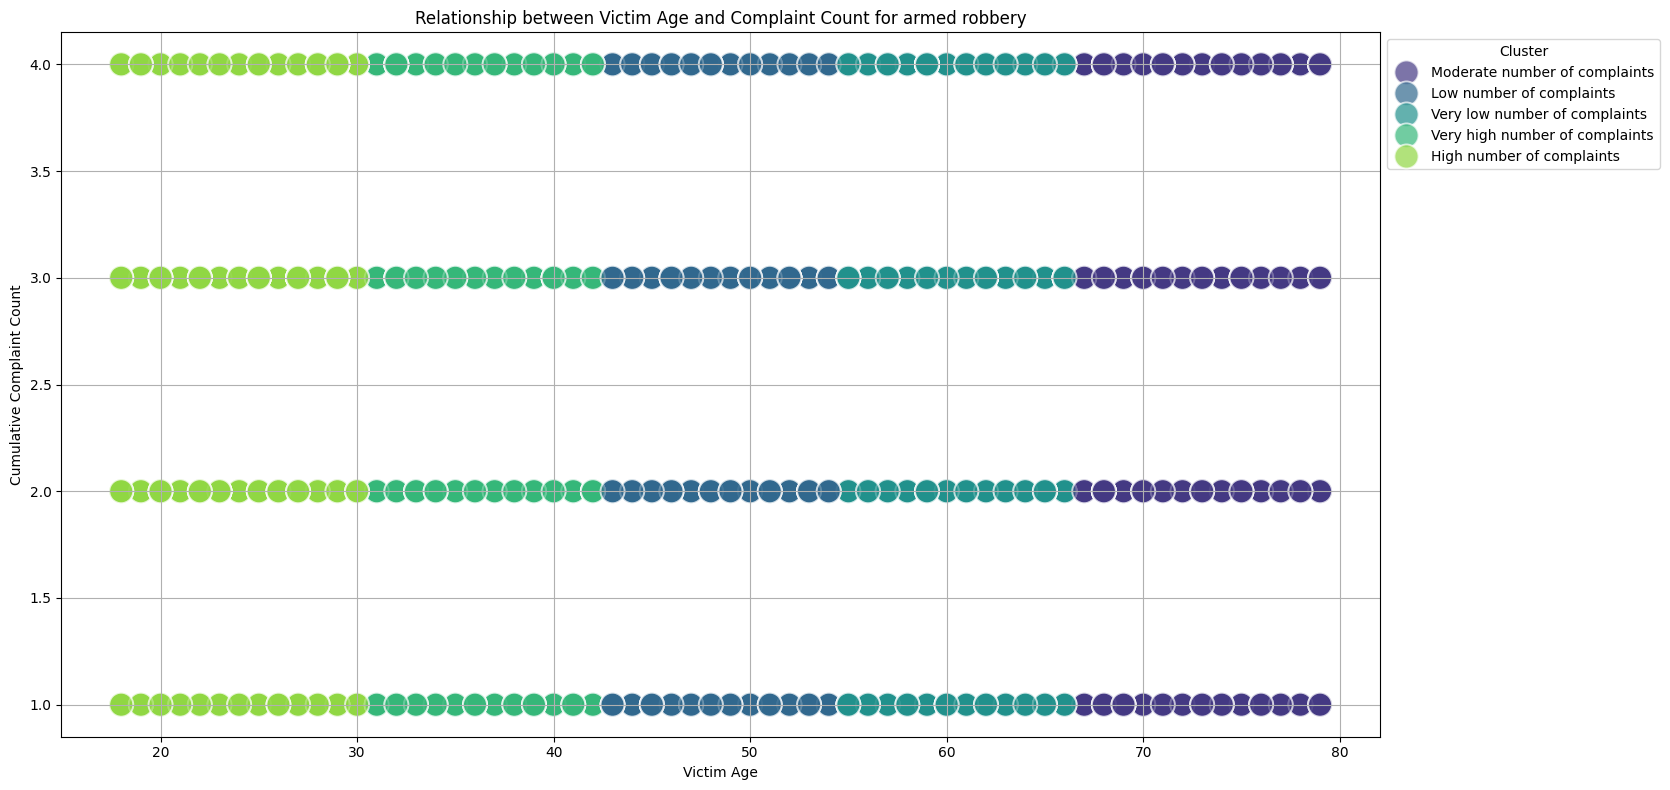

In [19]:
df = pd.read_csv('csv/complaints_normalized.csv')

df = df[(df['crime_type'] != 'N/A') & 
        (df['complaints_count'] != 0) &
        (df['victim_age'] != 0)]

le = LabelEncoder()
df['age_encoded'] = le.fit_transform(df['victim_age'])

X = df[['age_encoded', 'complaints_count']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

cluster_labels = {
    0: 'Low number of complaints',
    1: 'High number of complaints',
    2: 'Moderate number of complaints',
    3: 'Very high number of complaints',
    4: 'Very low number of complaints'
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

crime_types = df['crime_type'].dropna().unique()

for crime_type in crime_types:
    plt.figure(figsize=(14, 8))
    df_crime_type = df[df['crime_type'] == crime_type]
    
    sns.scatterplot(data=df_crime_type, x='victim_age', y='complaints_count', hue='cluster_label', palette='viridis', alpha=0.7, s=300)
    plt.xlabel('Victim Age')
    plt.ylabel('Cumulative Complaint Count')
    plt.title(f'Relationship between Victim Age and Complaint Count for {crime_type}')
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

c:\Users\BL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


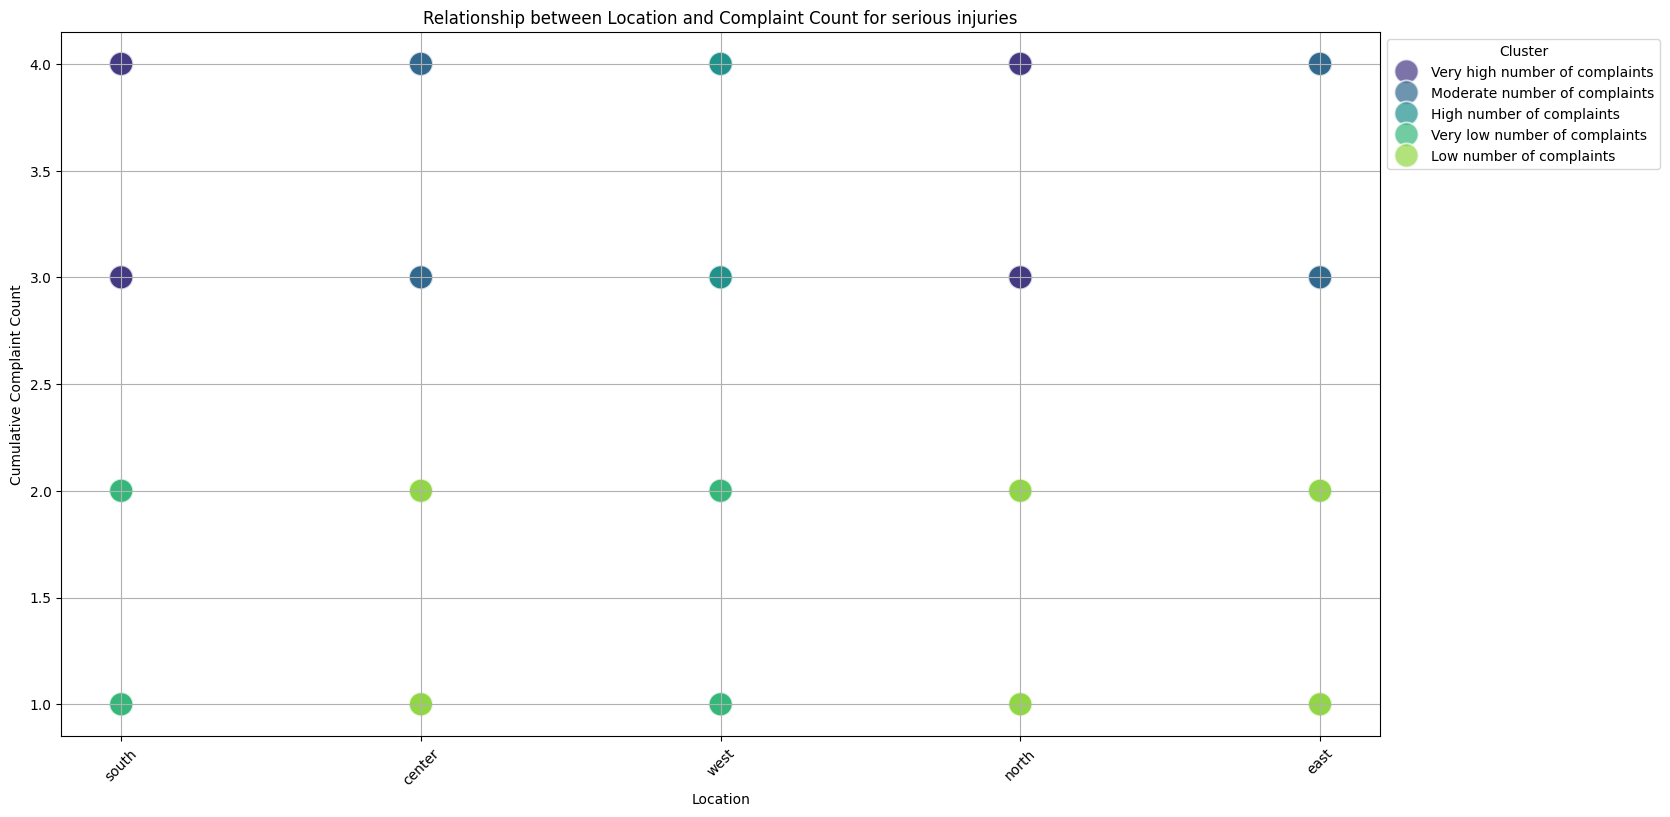

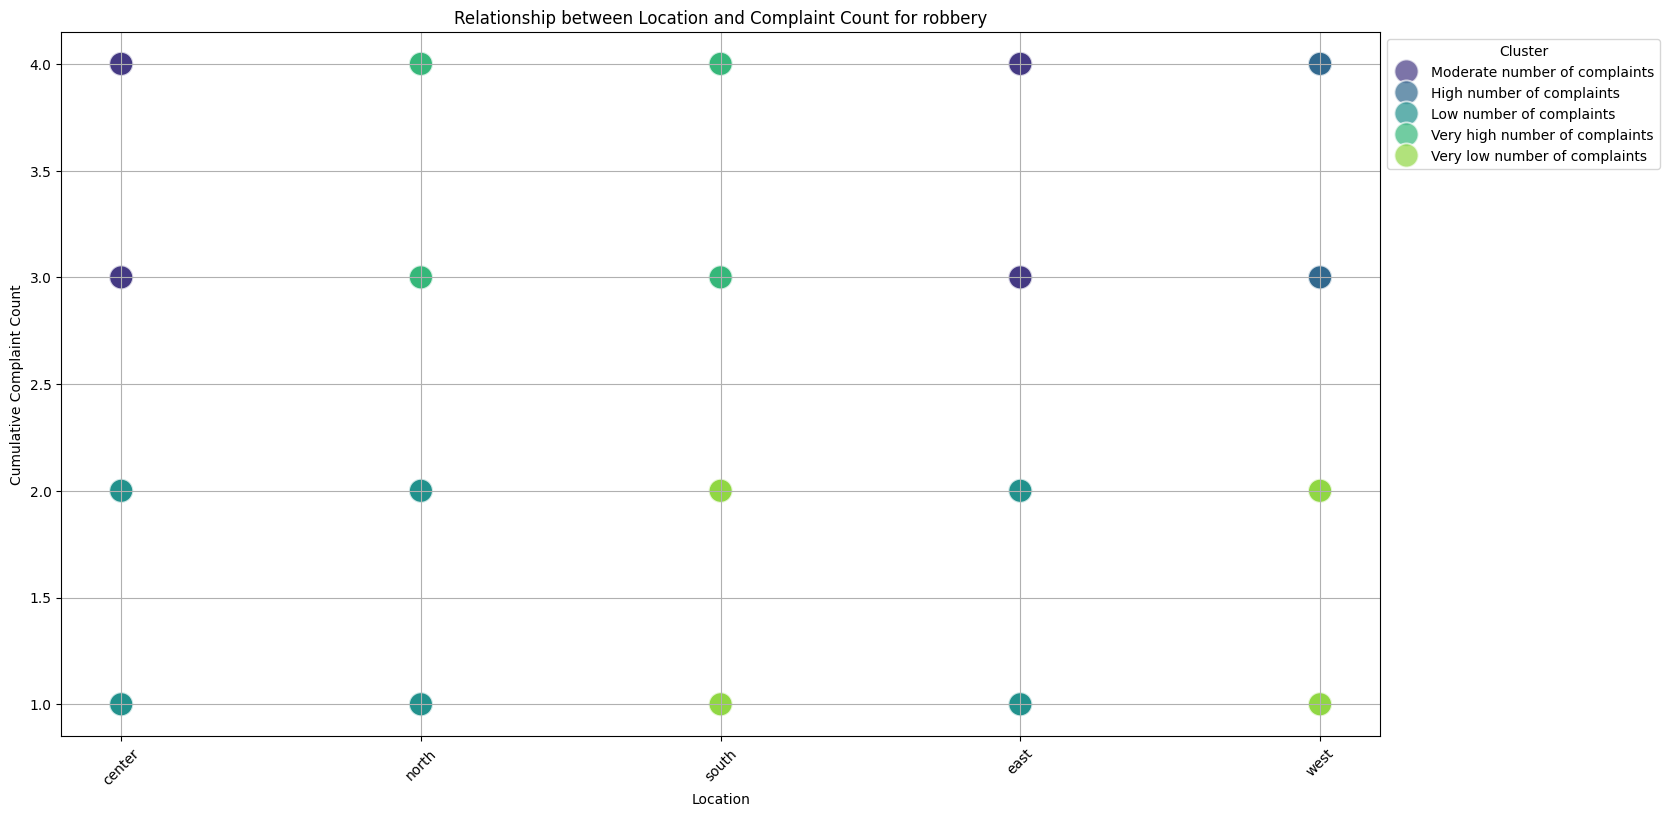

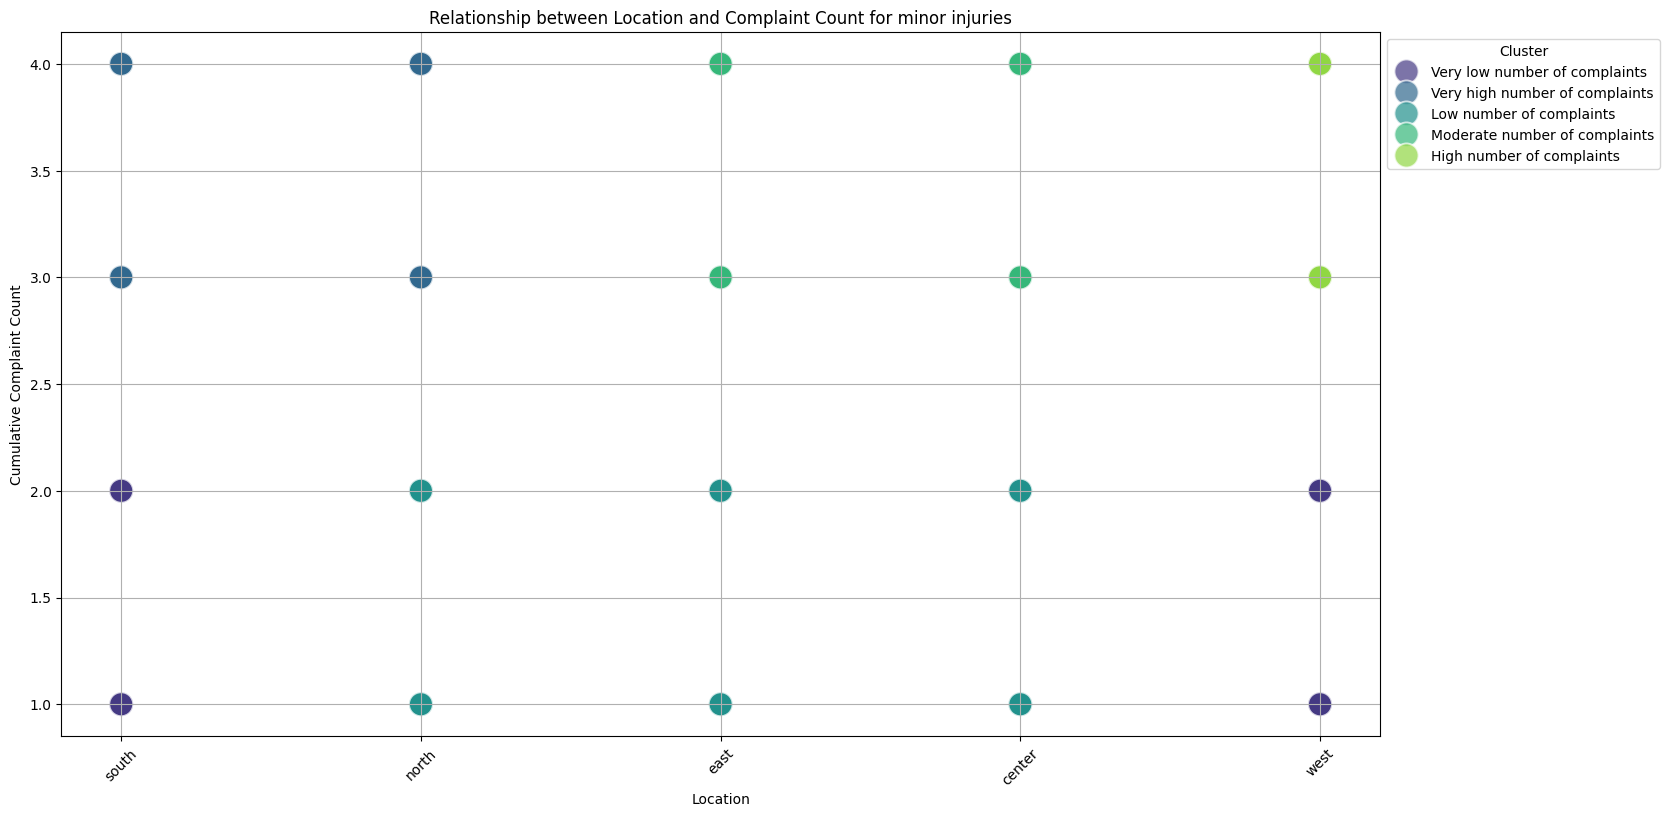

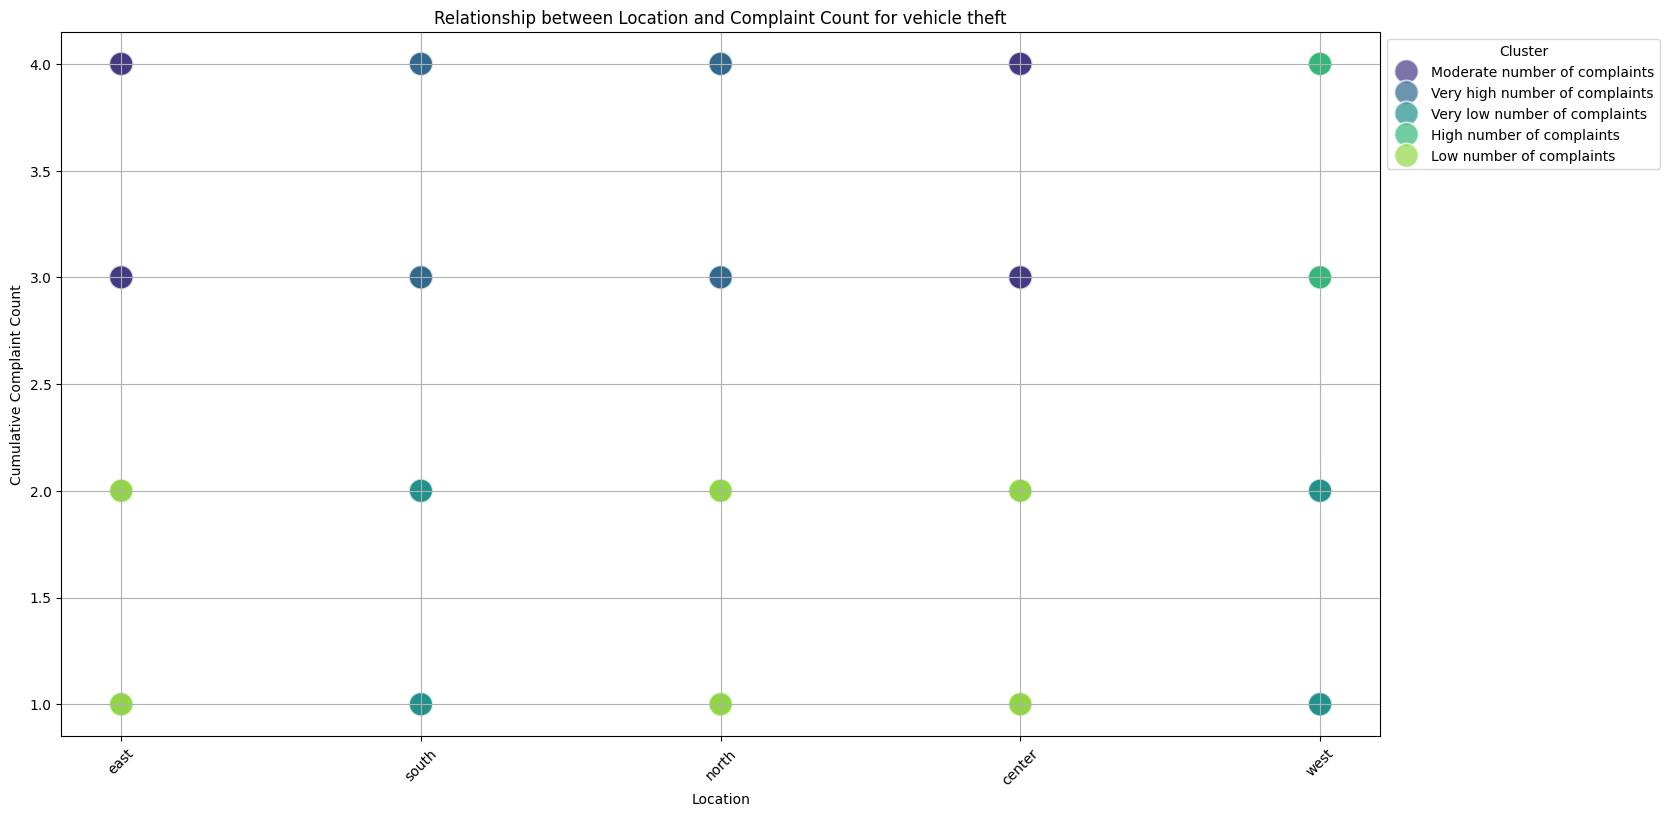

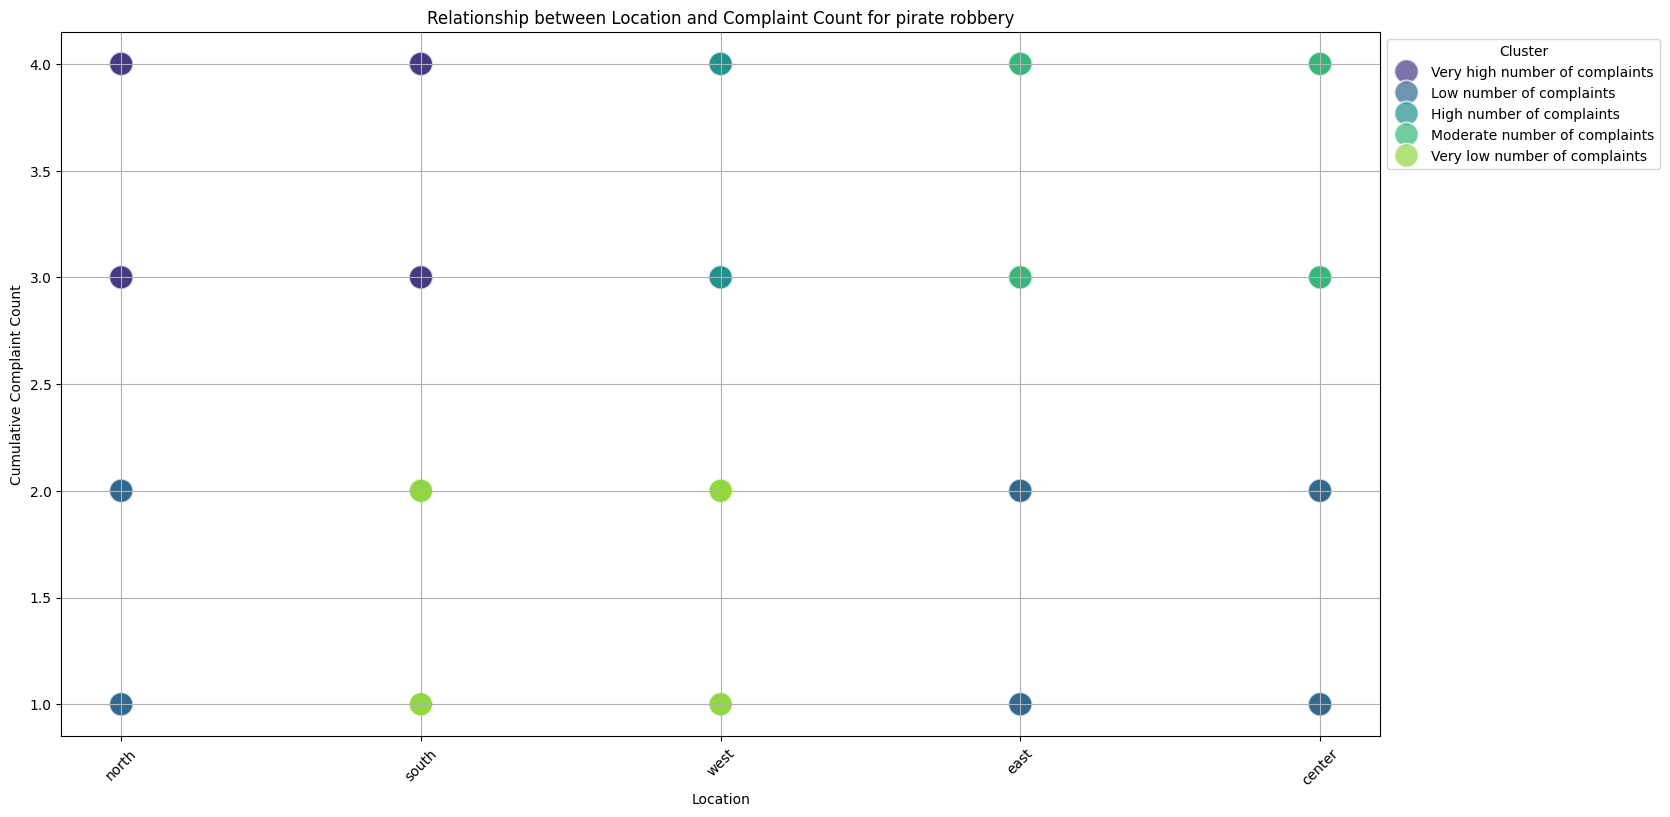

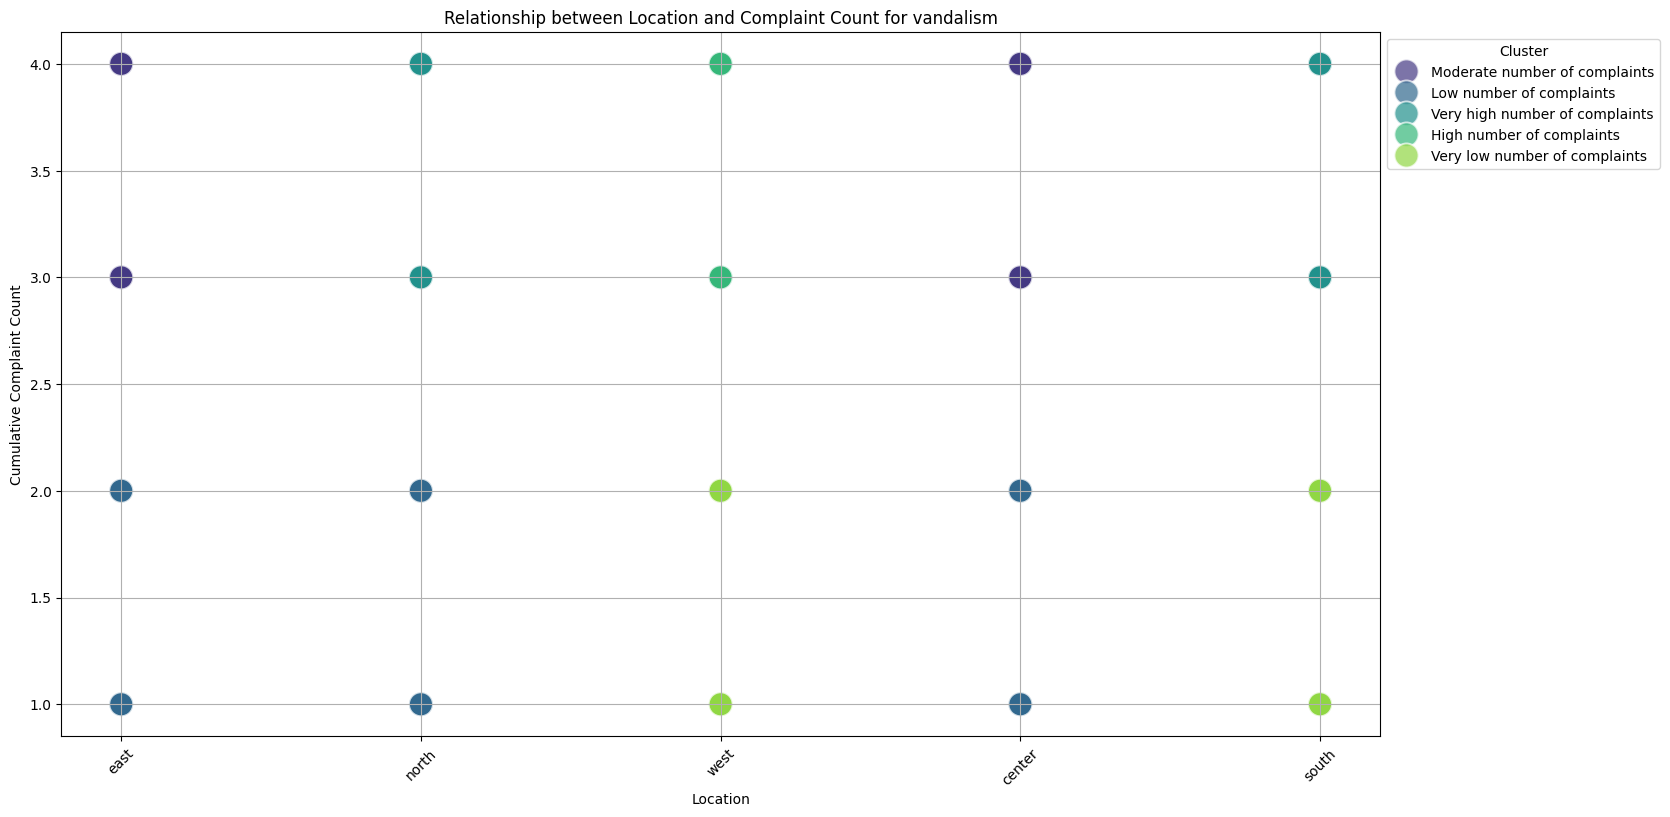

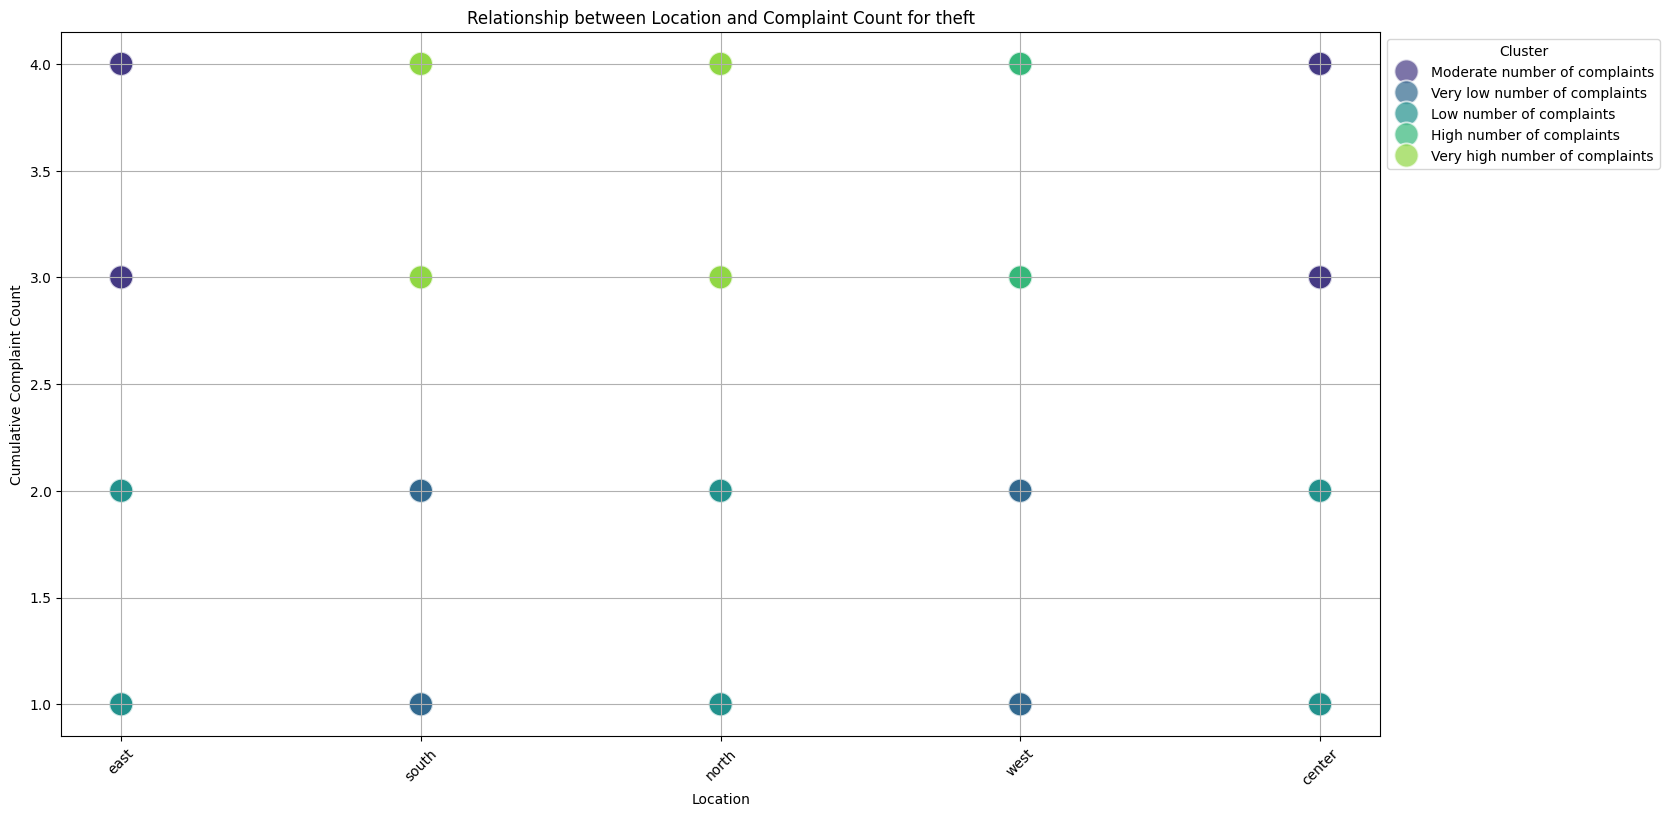

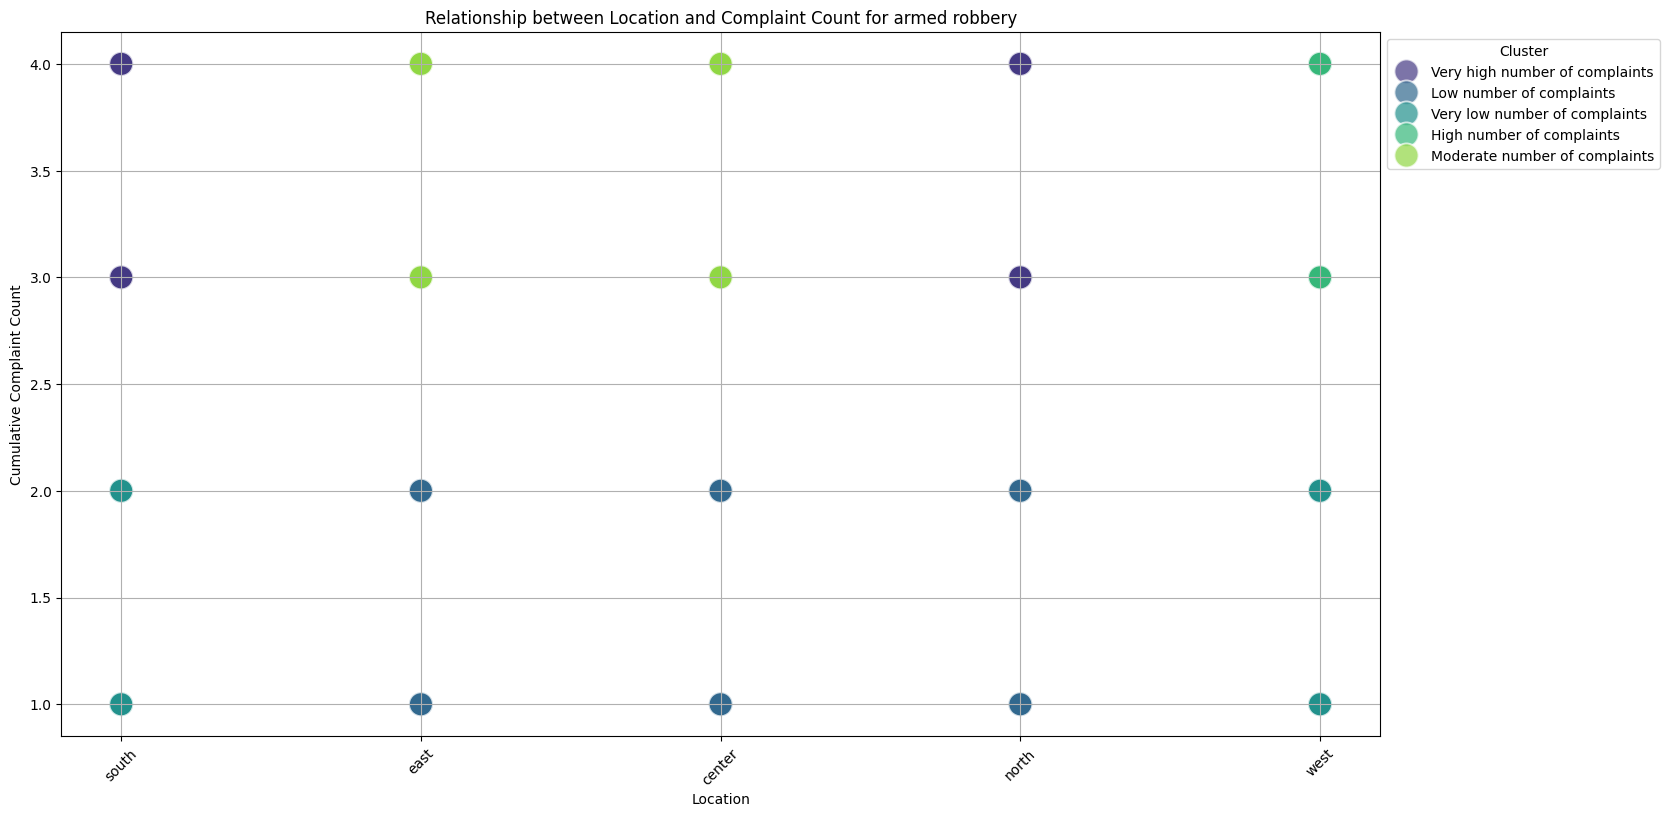

In [20]:
df = pd.read_csv('csv/complaints_normalized.csv')

df = df[(df['crime_type'] != 'N/A') & (df['complaints_count'] != 0)]
df = df[df['location'] != 'N/A']

le = LabelEncoder()
df['location_encoded'] = le.fit_transform(df['location'])

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['location_encoded', 'complaints_count']])

cluster_labels = {
    0: 'Low number of complaints',
    1: 'High number of complaints',
    2: 'Moderate number of complaints',
    3: 'Very high number of complaints',
    4: 'Very low number of complaints'
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

crime_types = df['crime_type'].dropna().unique()

for crime_type in crime_types:
    plt.figure(figsize=(14, 8))
    df_crime_type = df[df['crime_type'] == crime_type]
    
    sns.scatterplot(data=df_crime_type, x='location', y='complaints_count', hue='cluster_label', palette='viridis', alpha=0.7, s=300)
    plt.xlabel('Location')
    plt.ylabel('Cumulative Complaint Count')
    plt.title(f'Relationship between Location and Complaint Count for {crime_type}')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

c:\Users\BL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


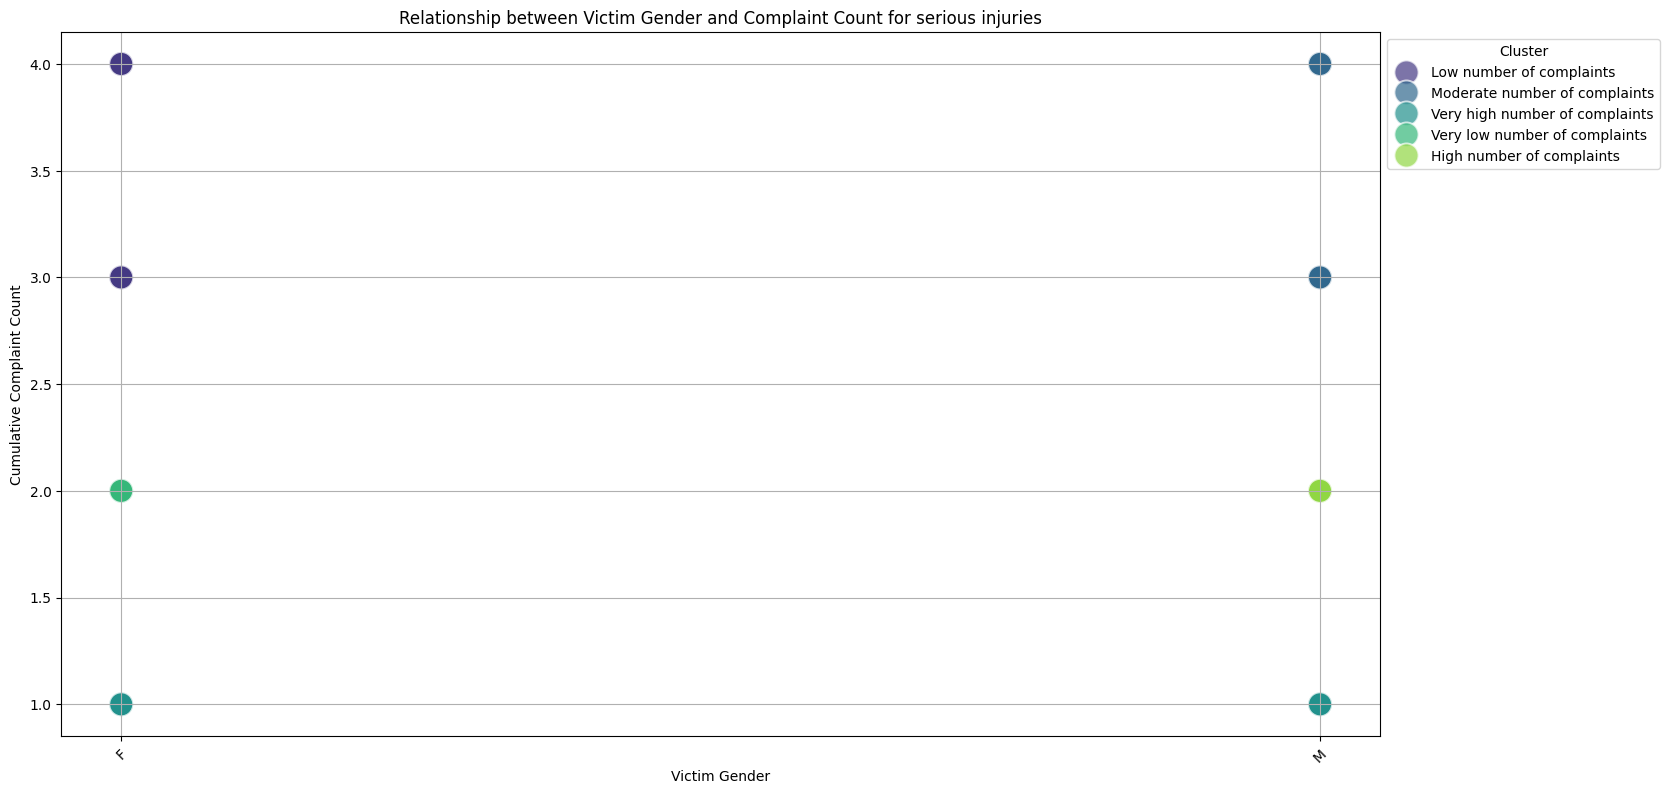

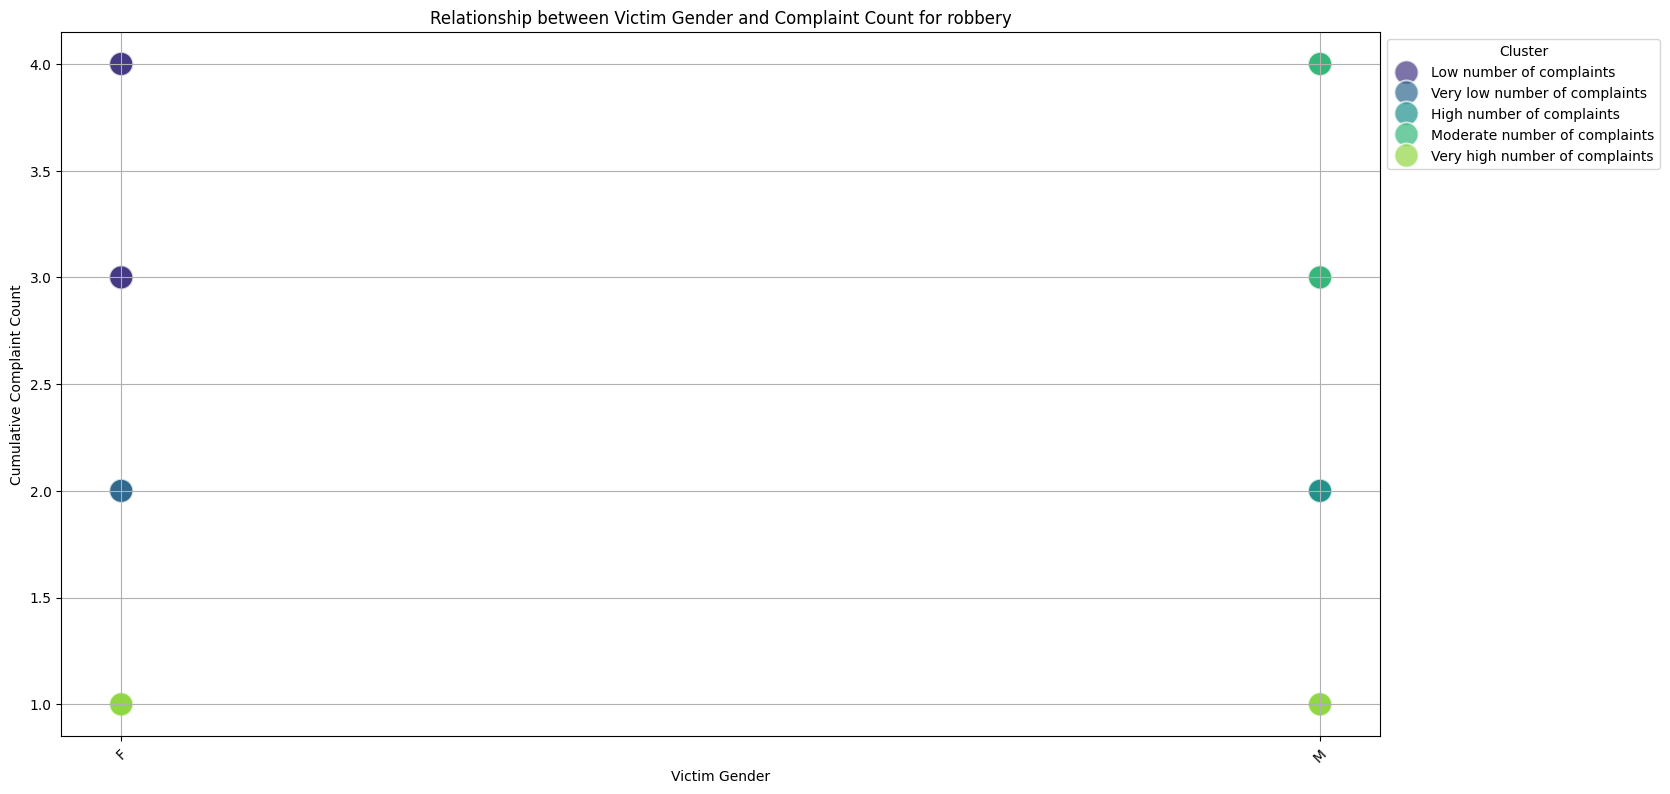

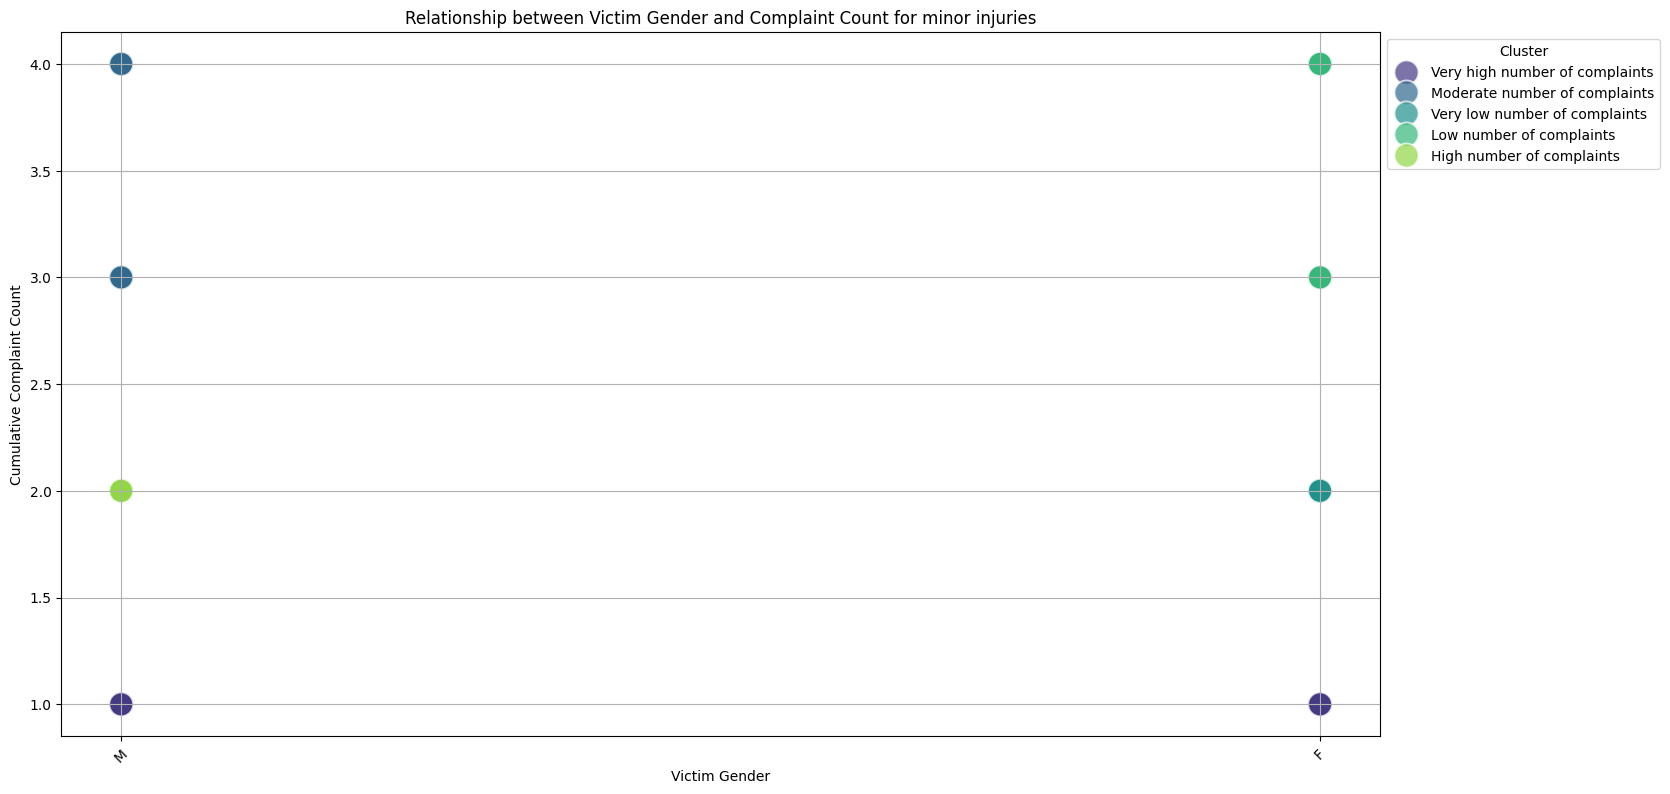

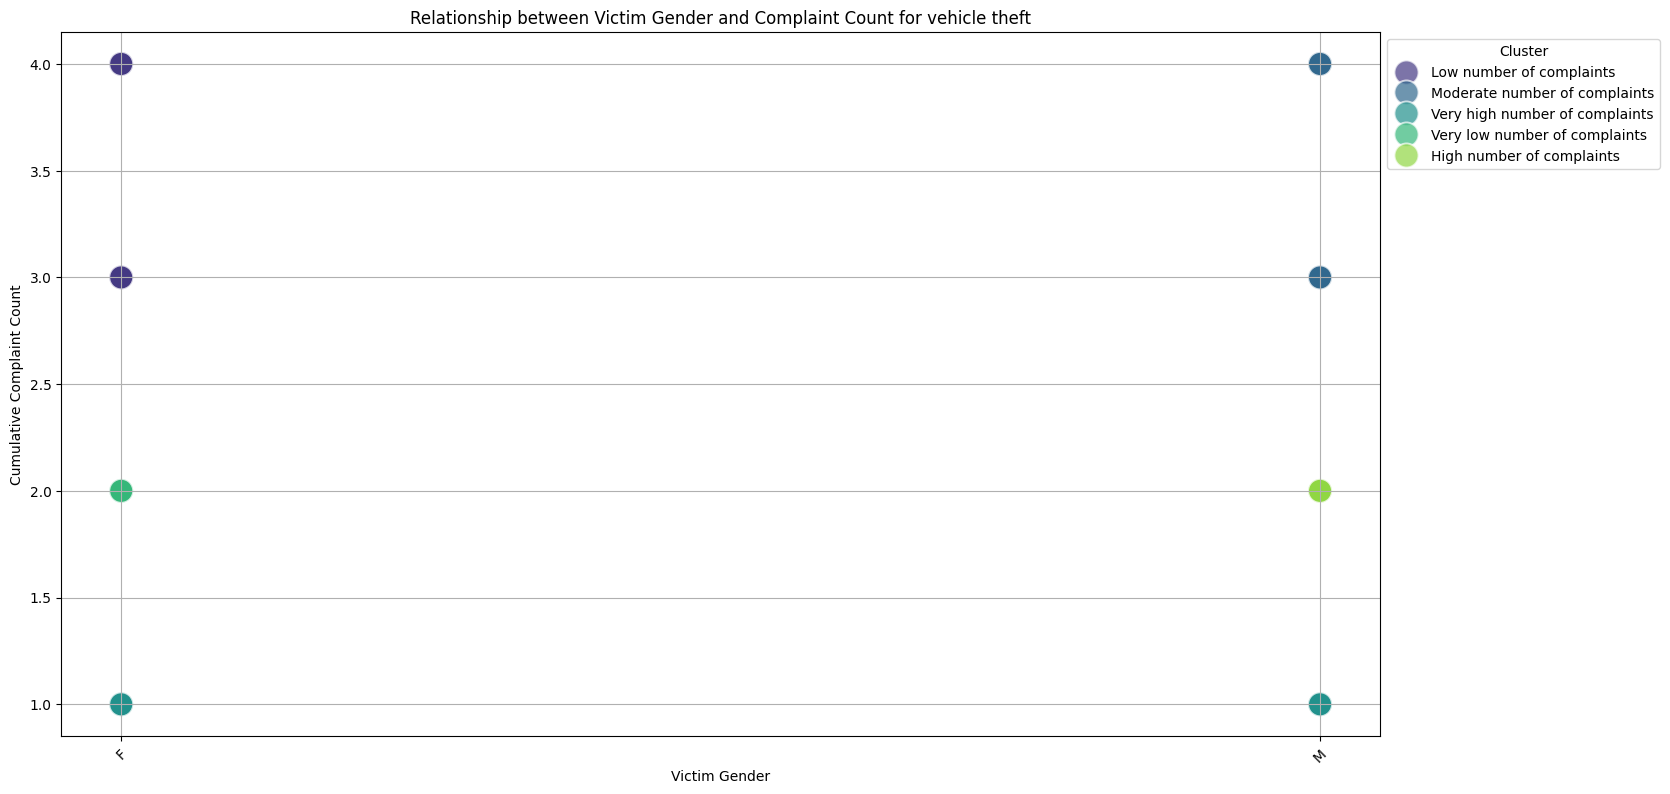

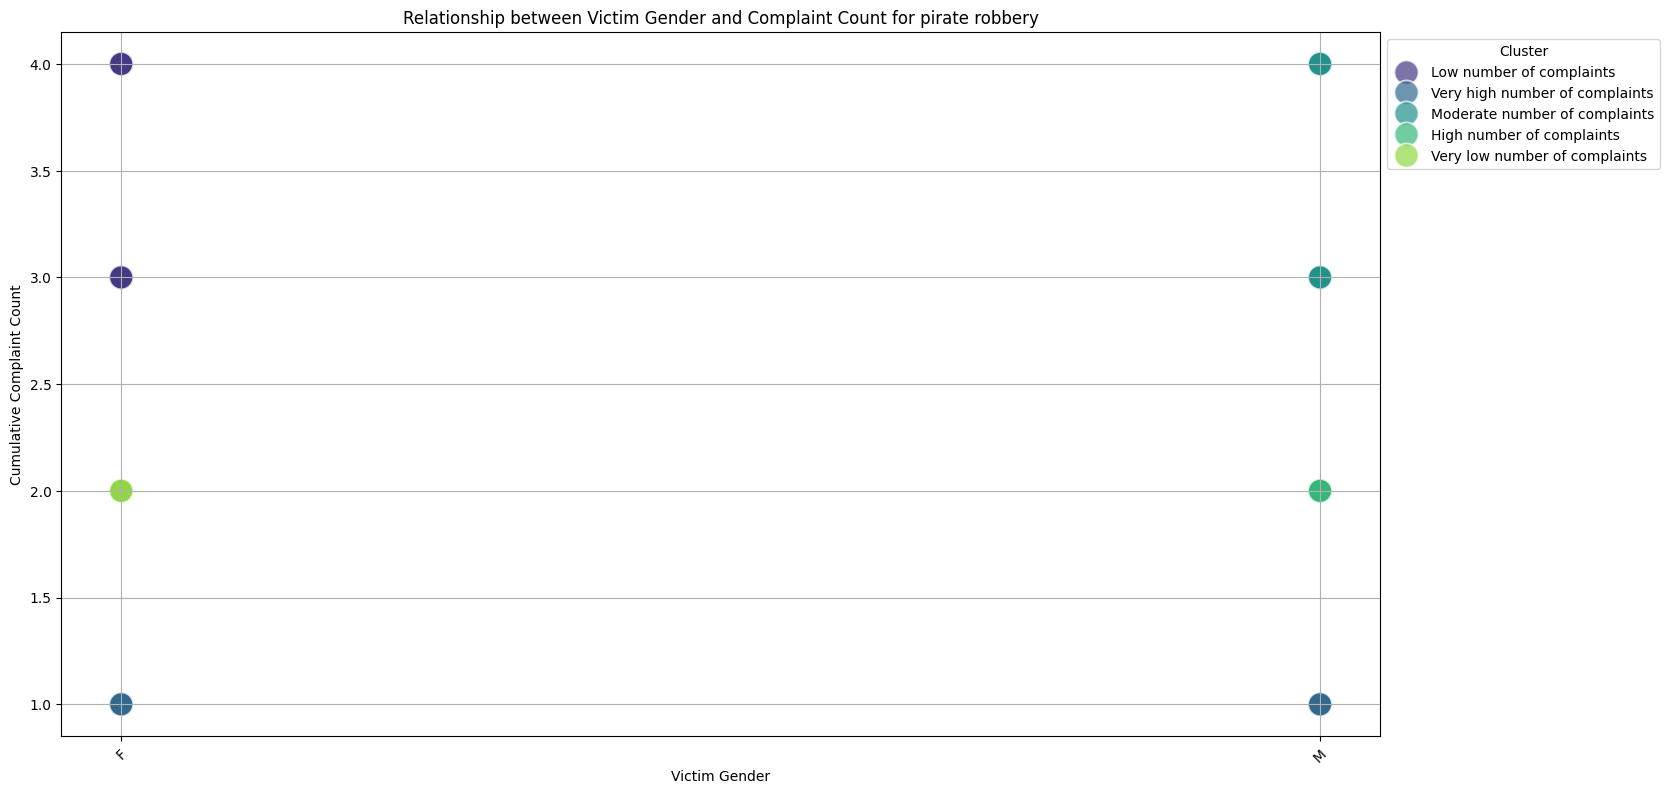

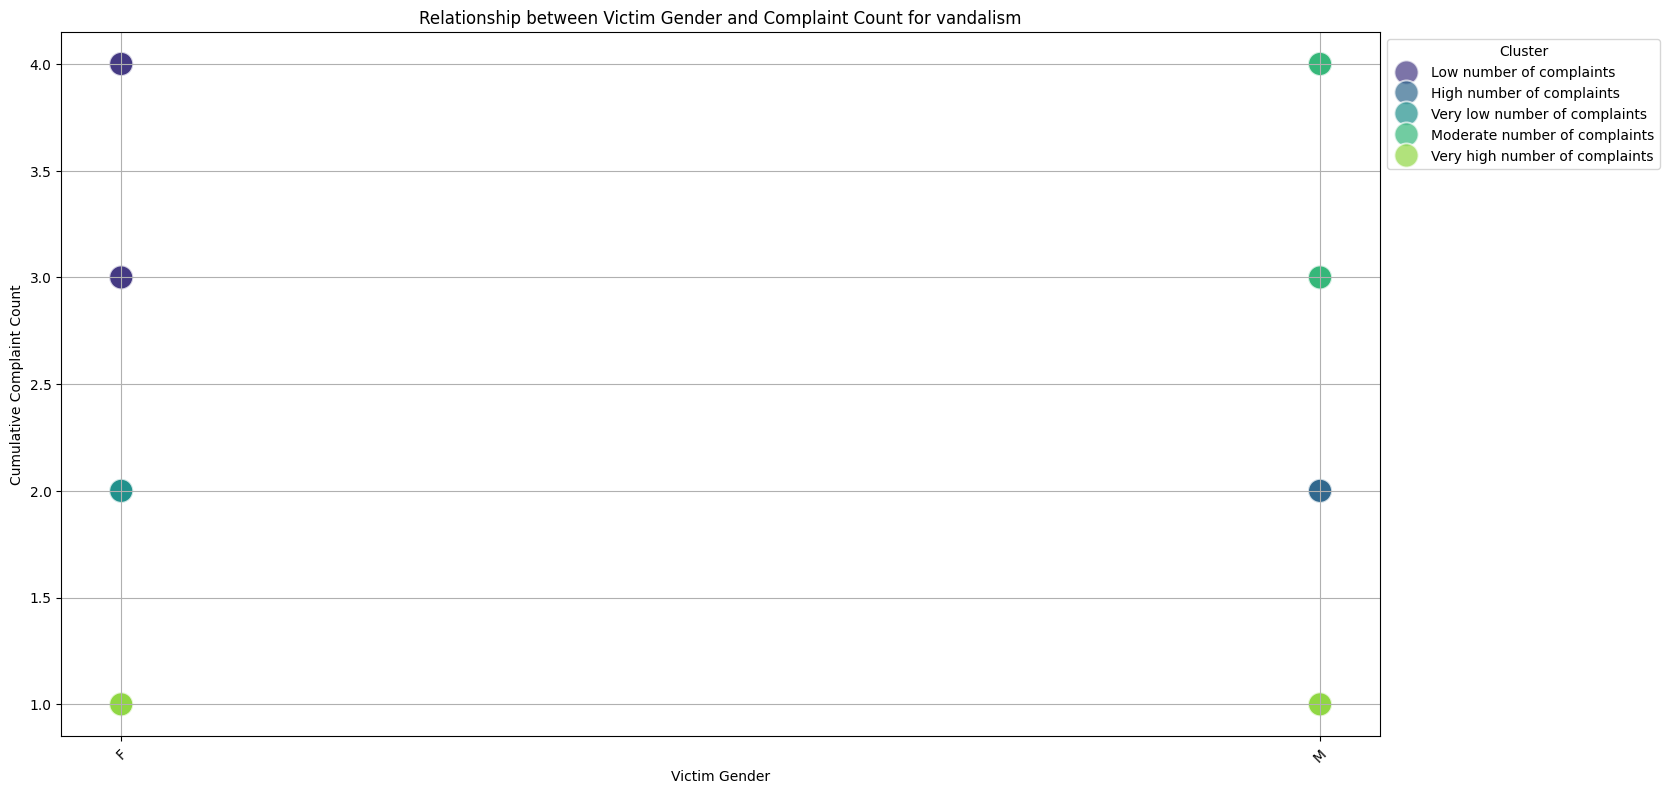

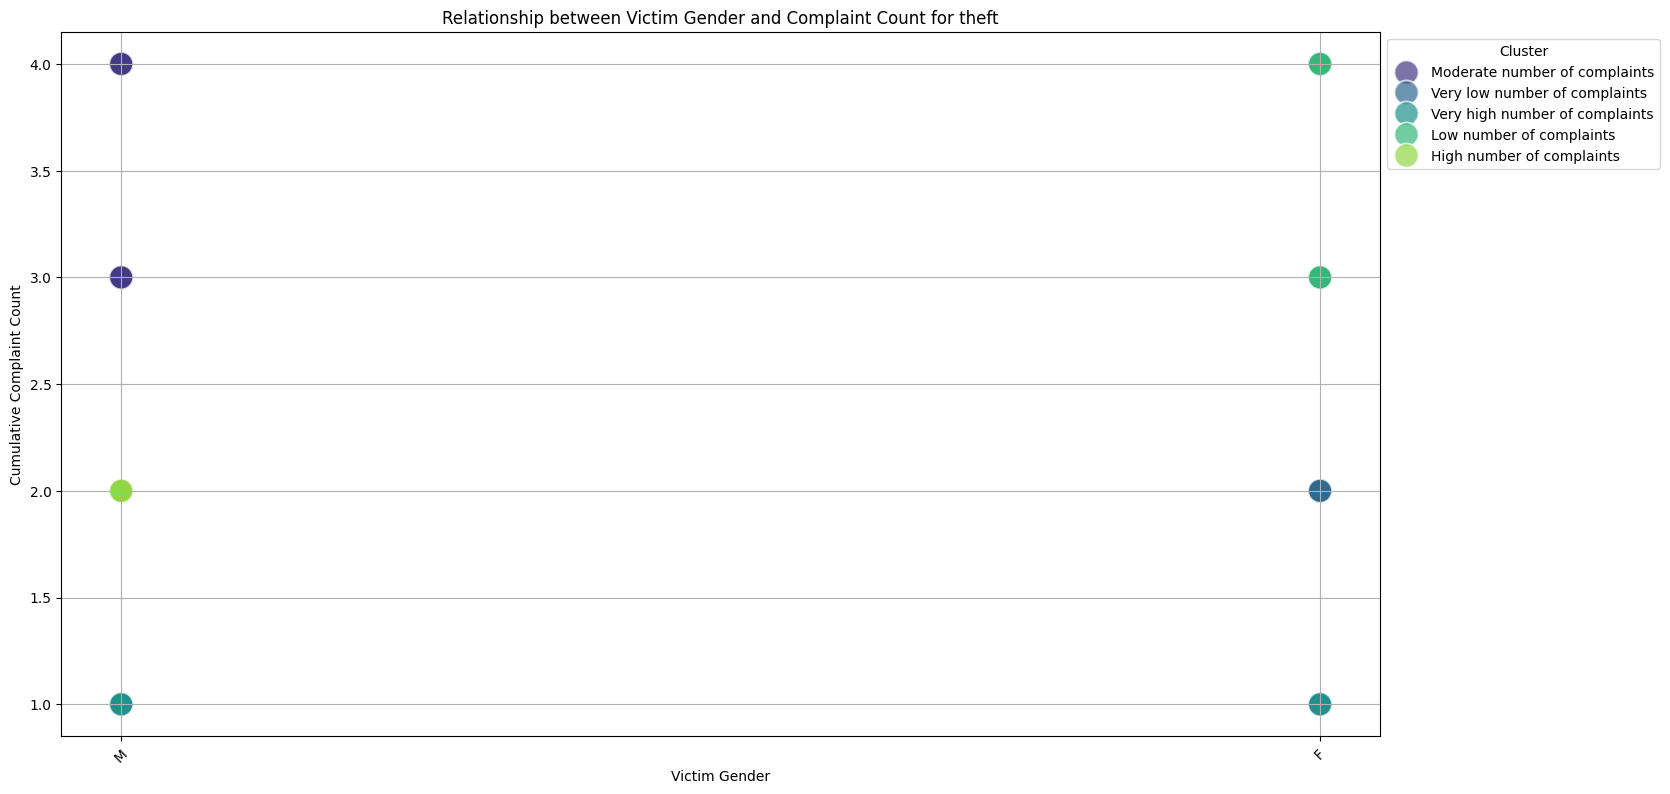

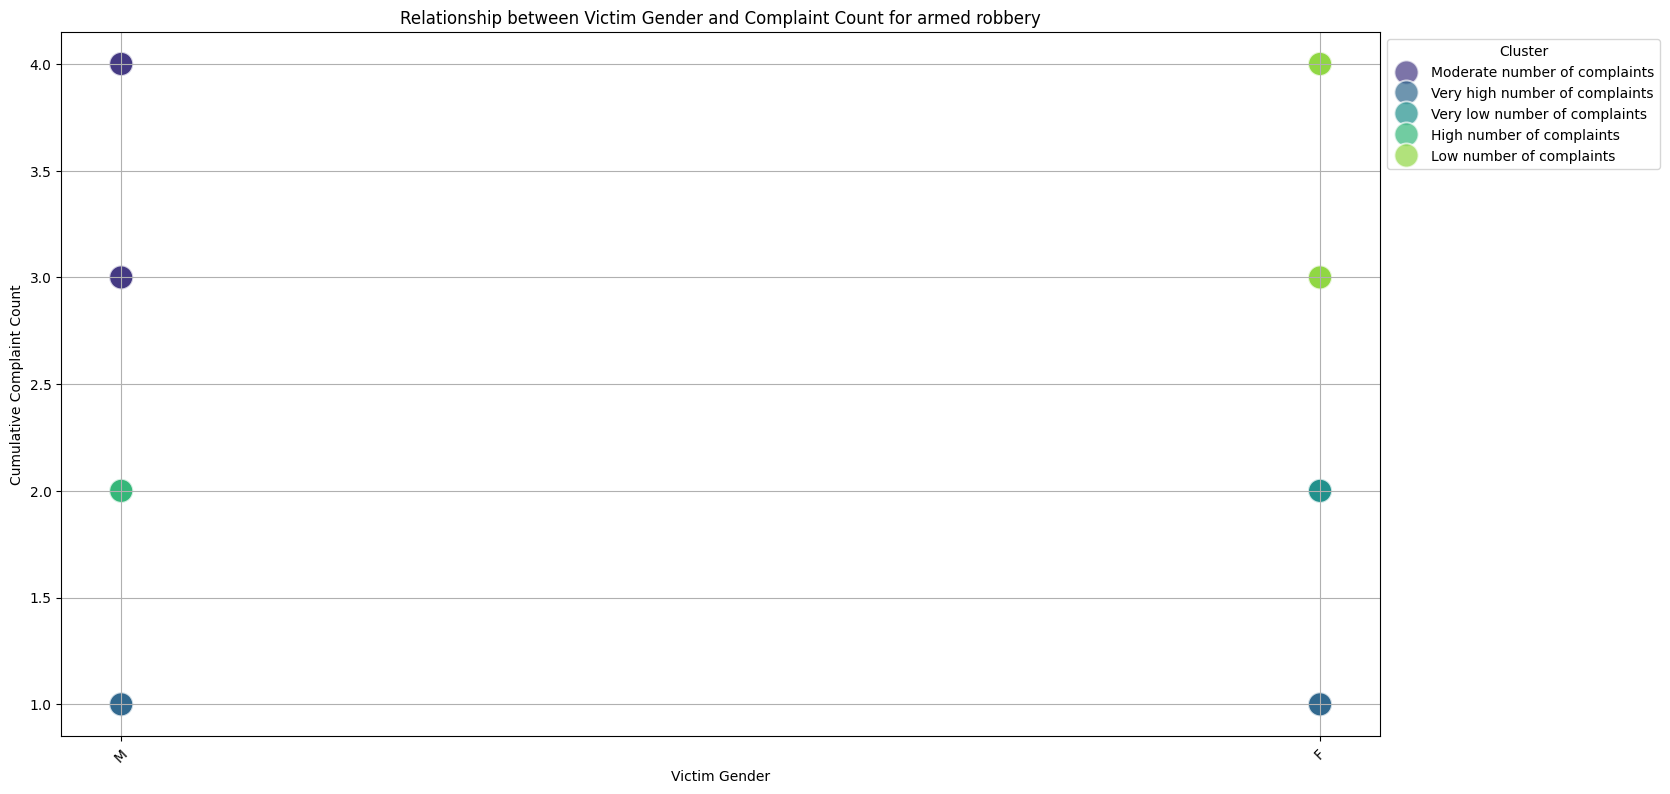

In [21]:
df = pd.read_csv('csv/complaints_normalized.csv')

df = df[(df['crime_type'] != 'N/A') &  
        (df['complaints_count'] != 0) &
        (df['victim_gender'] != 'N/A')]

le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['victim_gender'].astype(str))

X = df[['gender_encoded', 'complaints_count']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

cluster_labels = {
    0: 'Low number of complaints',
    1: 'High number of complaints',
    2: 'Moderate number of complaints',
    3: 'Very high number of complaints',
    4: 'Very low number of complaints'
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

crime_types = df['crime_type'].dropna().unique()

for crime_type in crime_types:
    plt.figure(figsize=(14, 8))
    df_crime_type = df[df['crime_type'] == crime_type]
    
    sns.scatterplot(data=df_crime_type, x='victim_gender', y='complaints_count', hue='cluster_label', palette='viridis', alpha=0.7, s=300)
    plt.xlabel('Victim Gender')
    plt.ylabel('Cumulative Complaint Count')
    plt.title(f'Relationship between Victim Gender and Complaint Count for {crime_type}')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

c:\Users\BL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


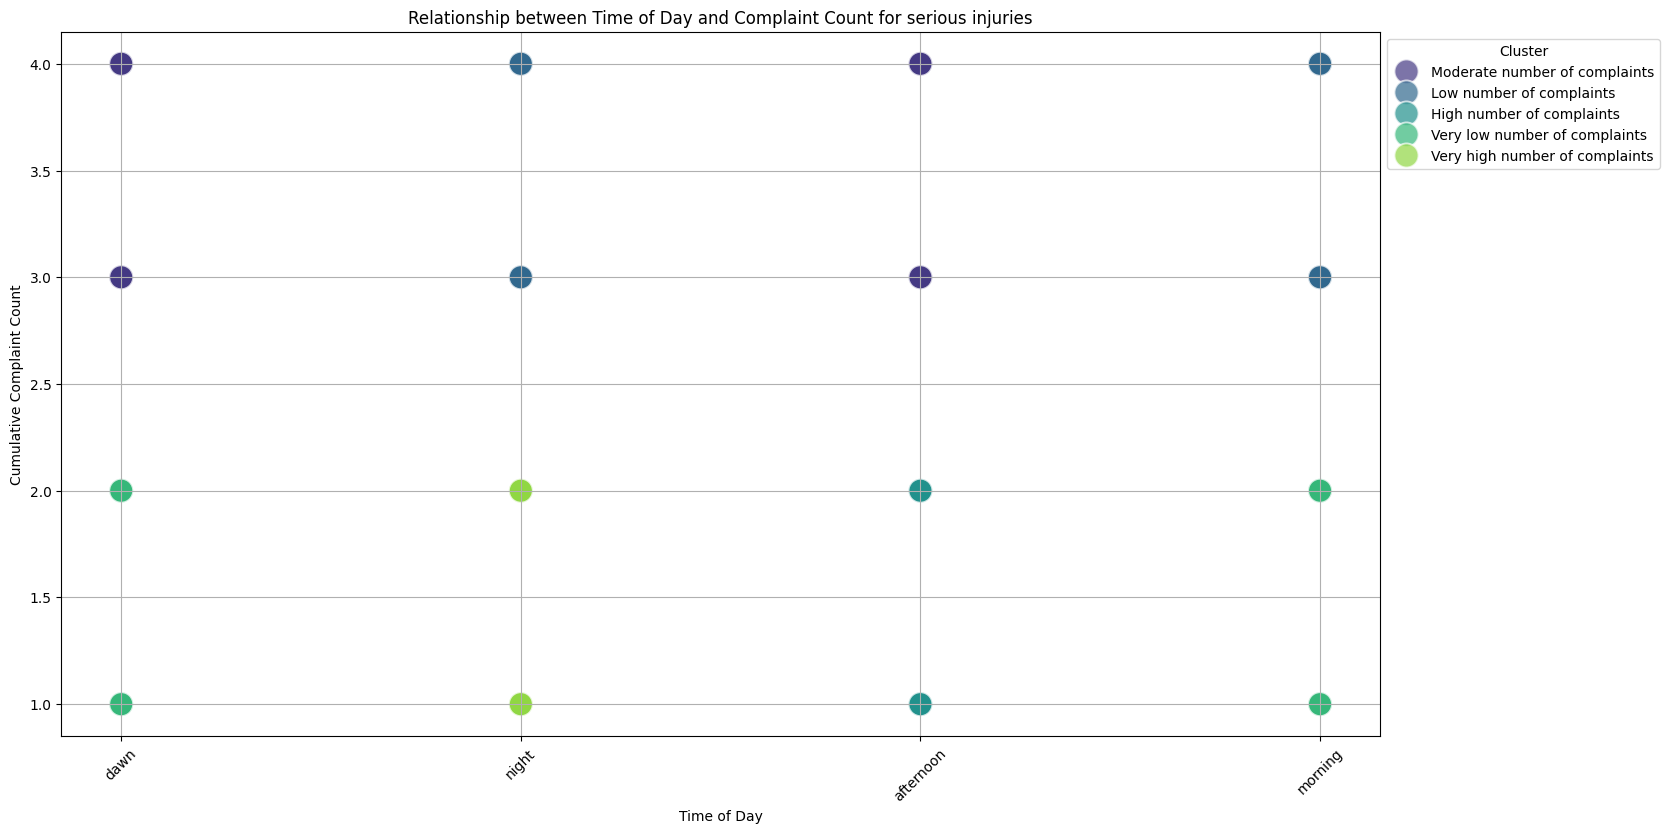

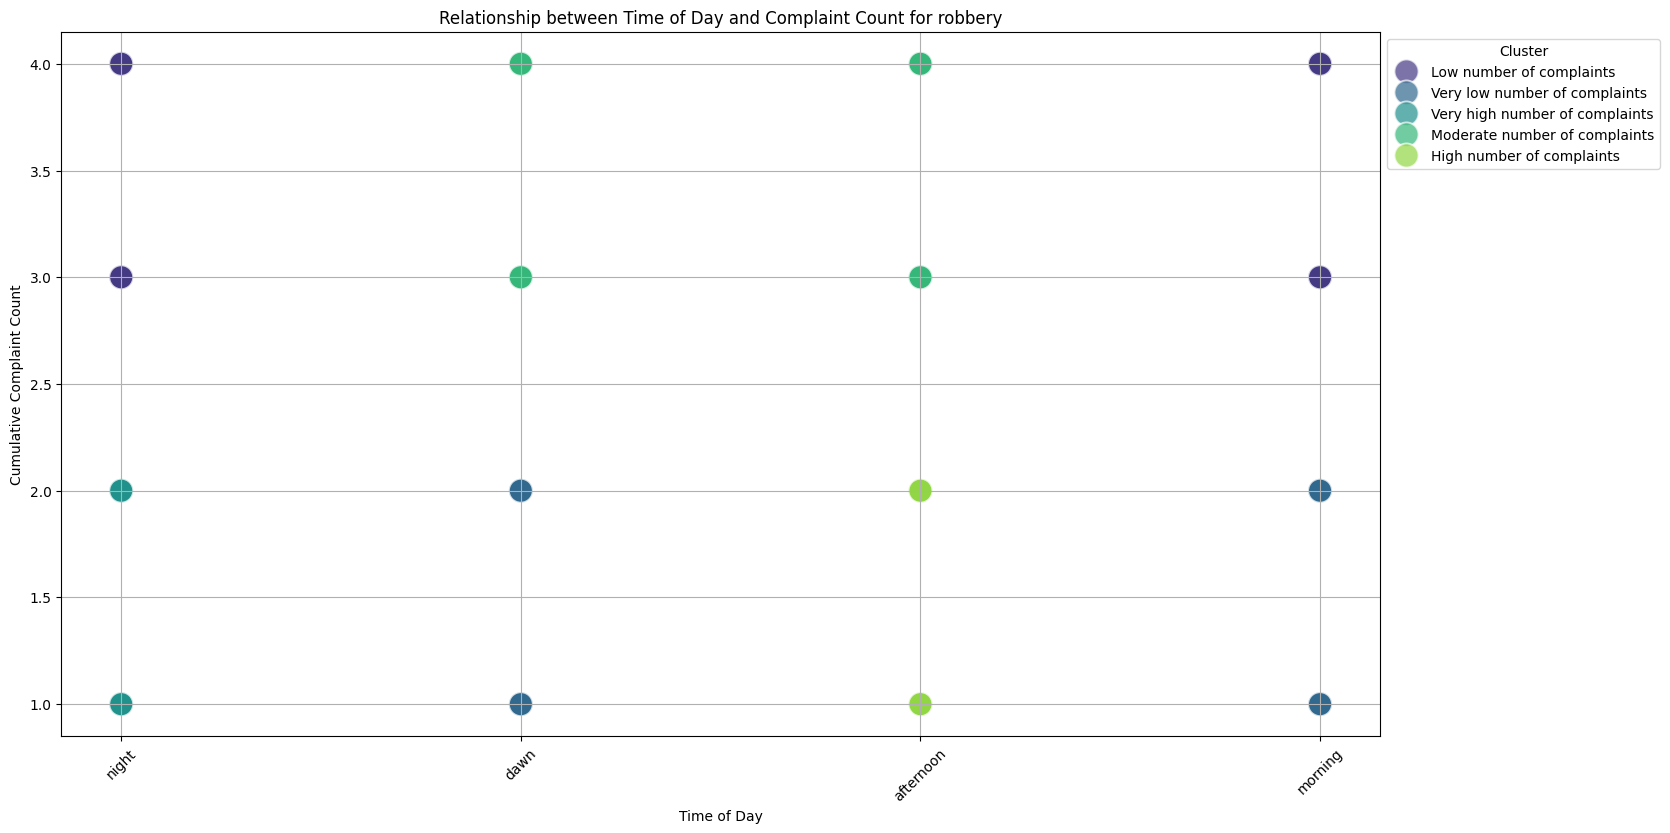

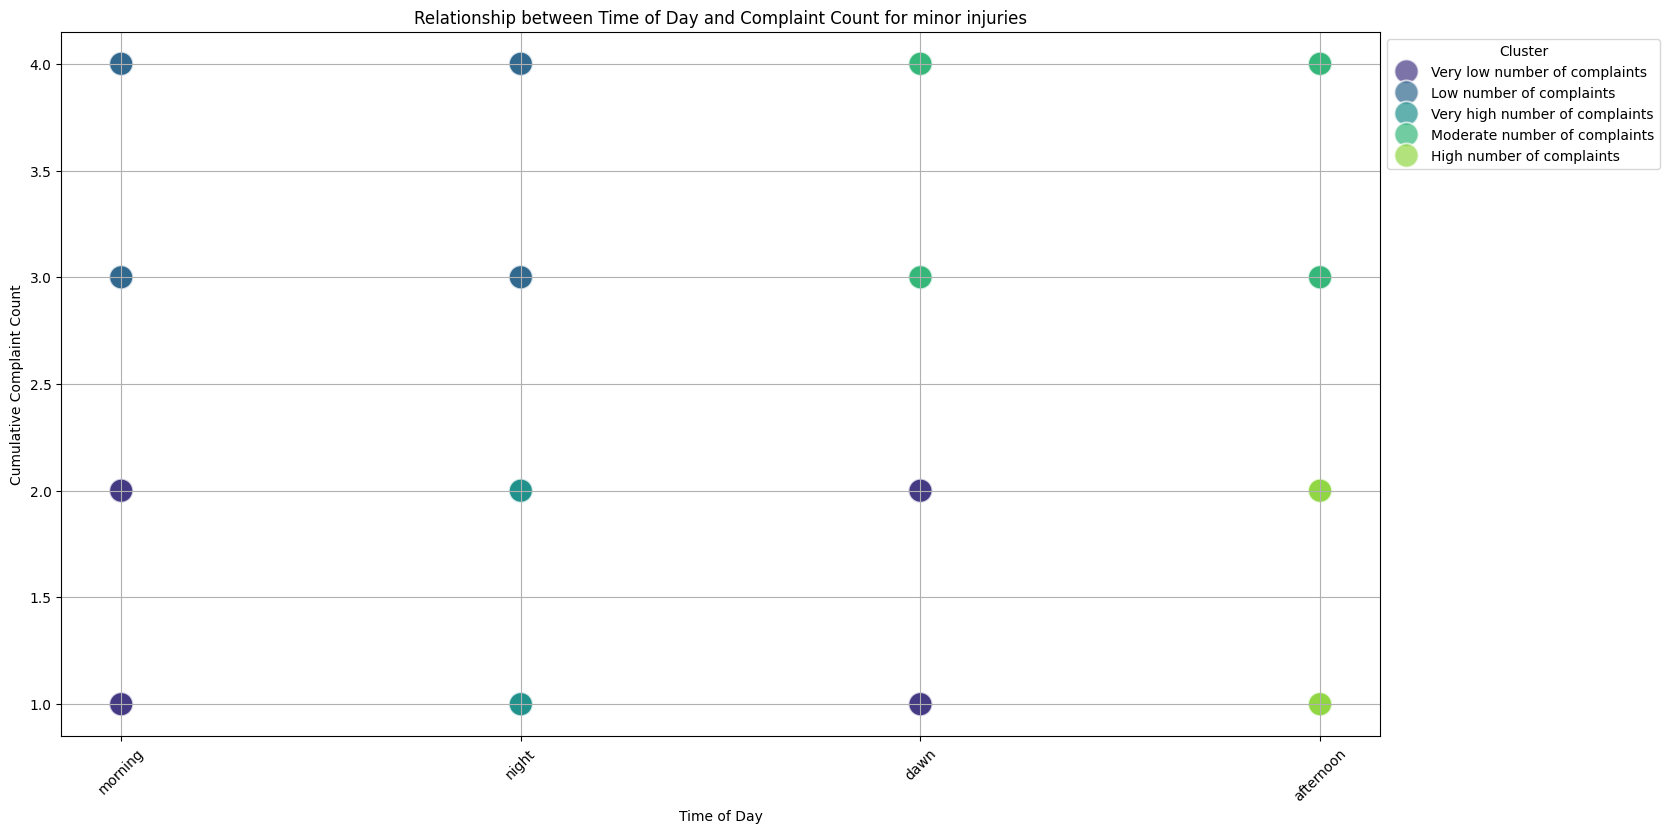

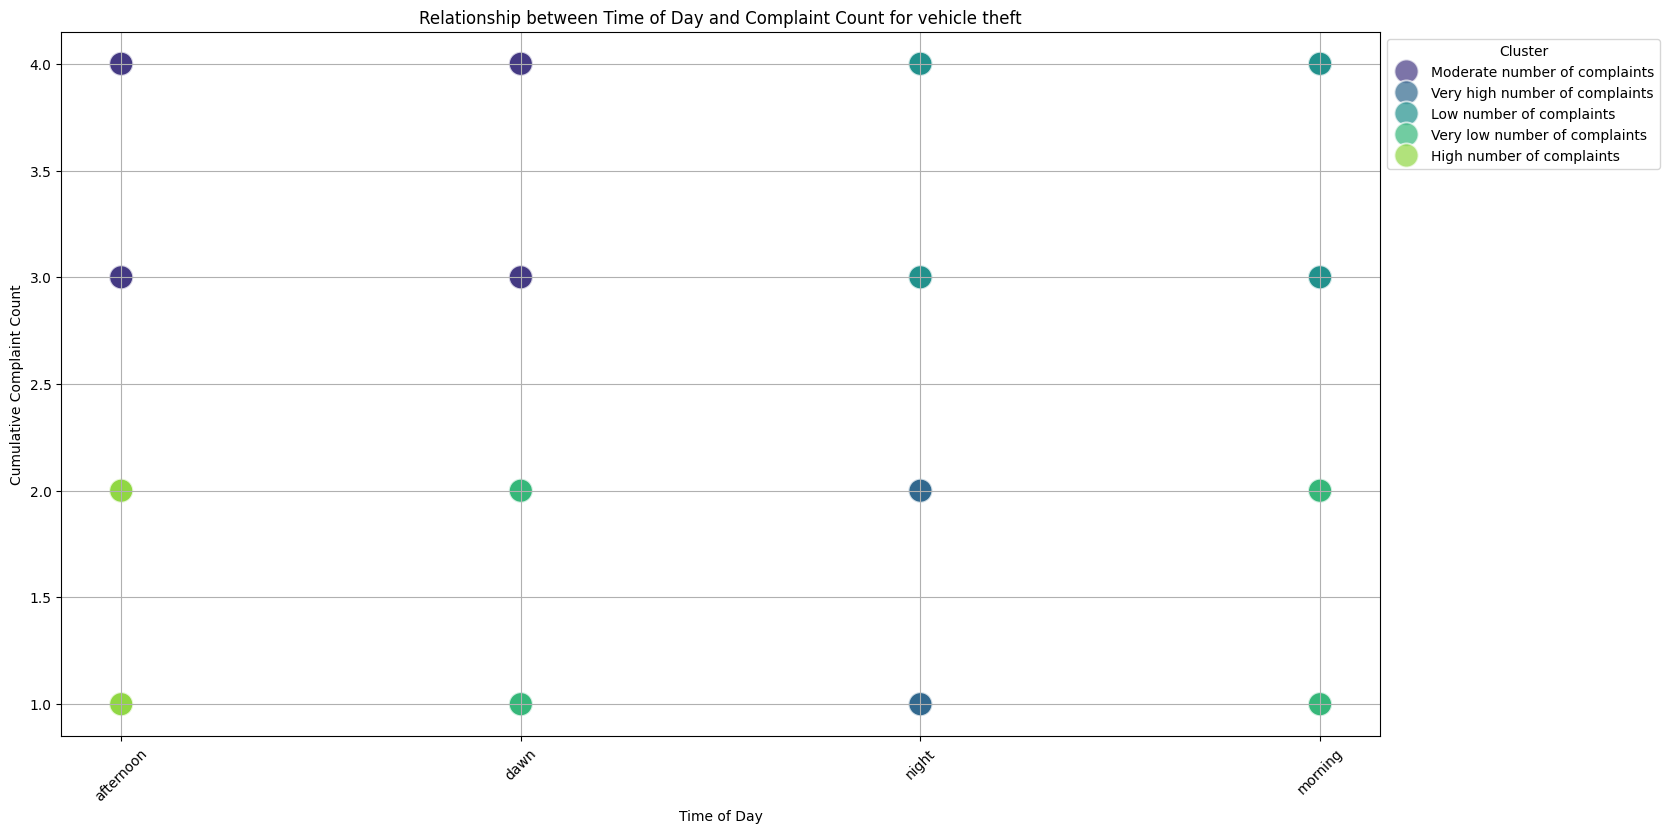

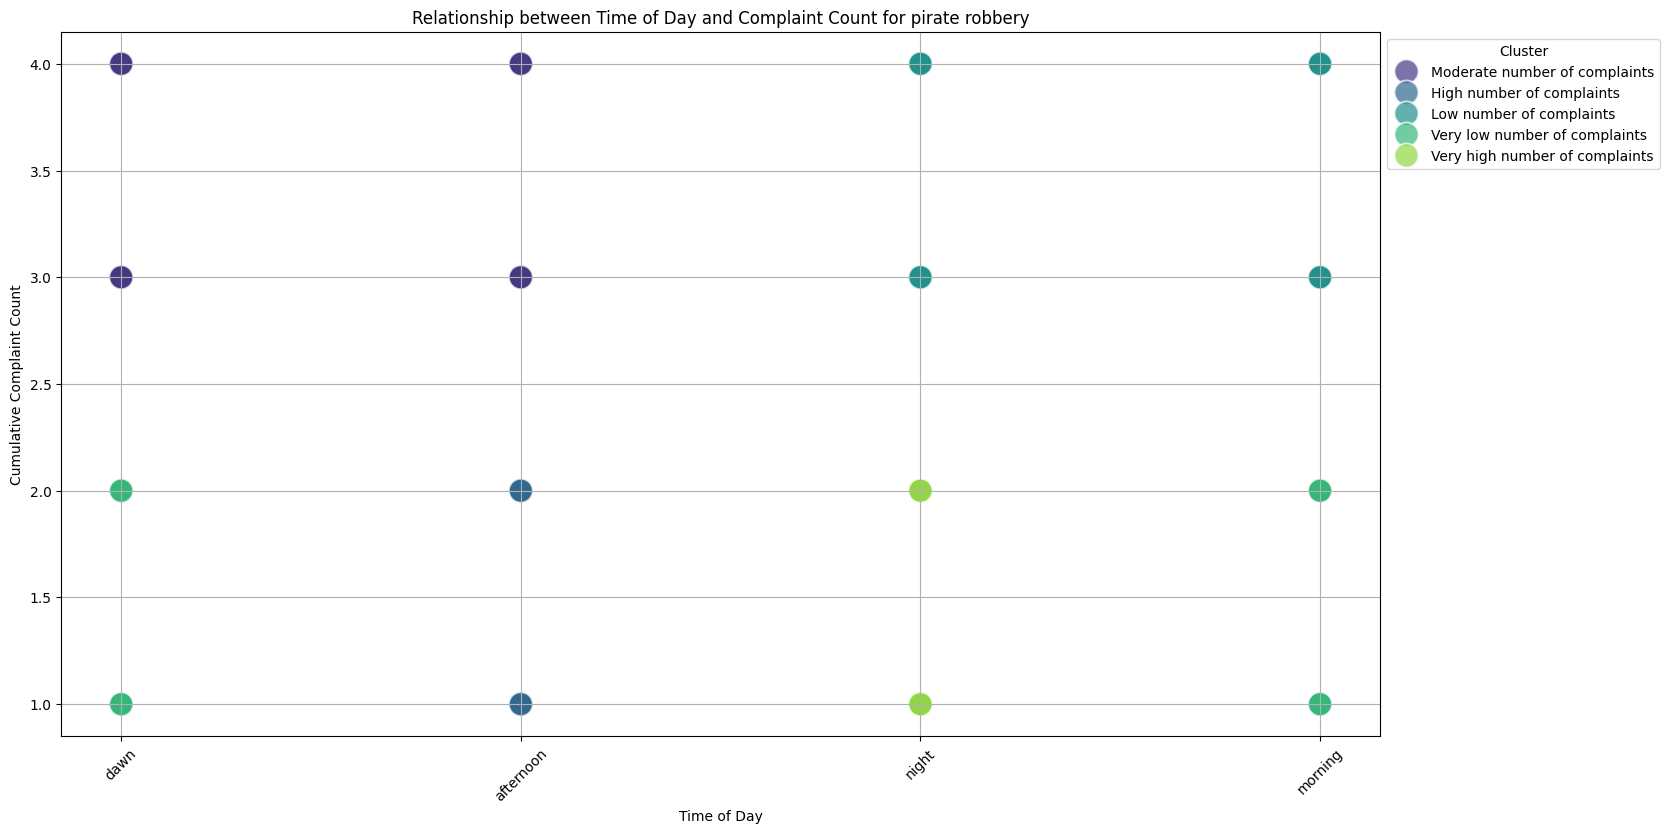

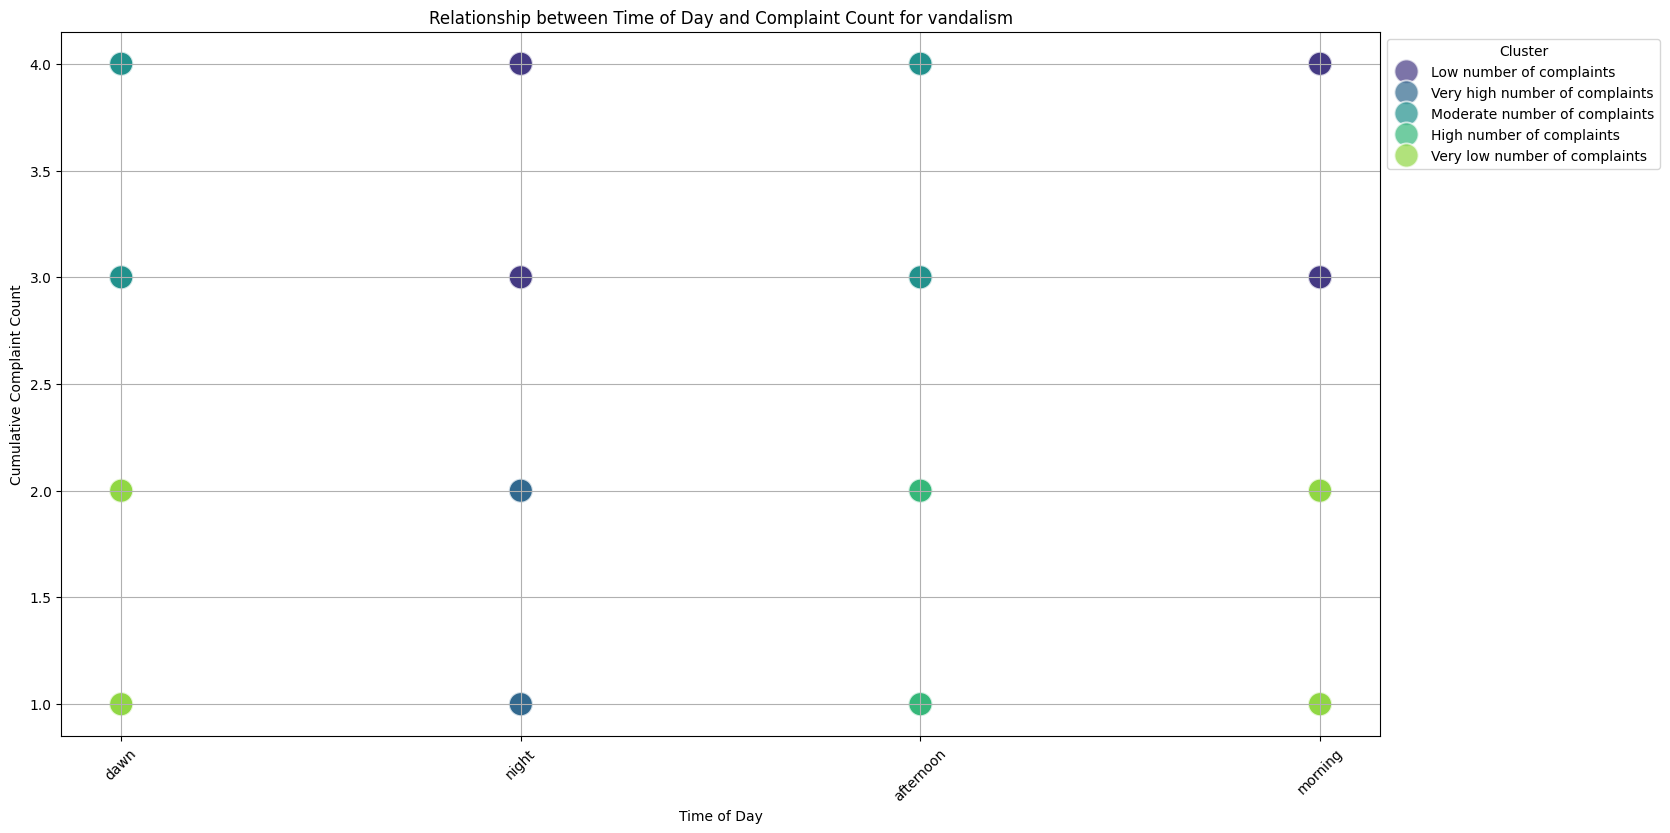

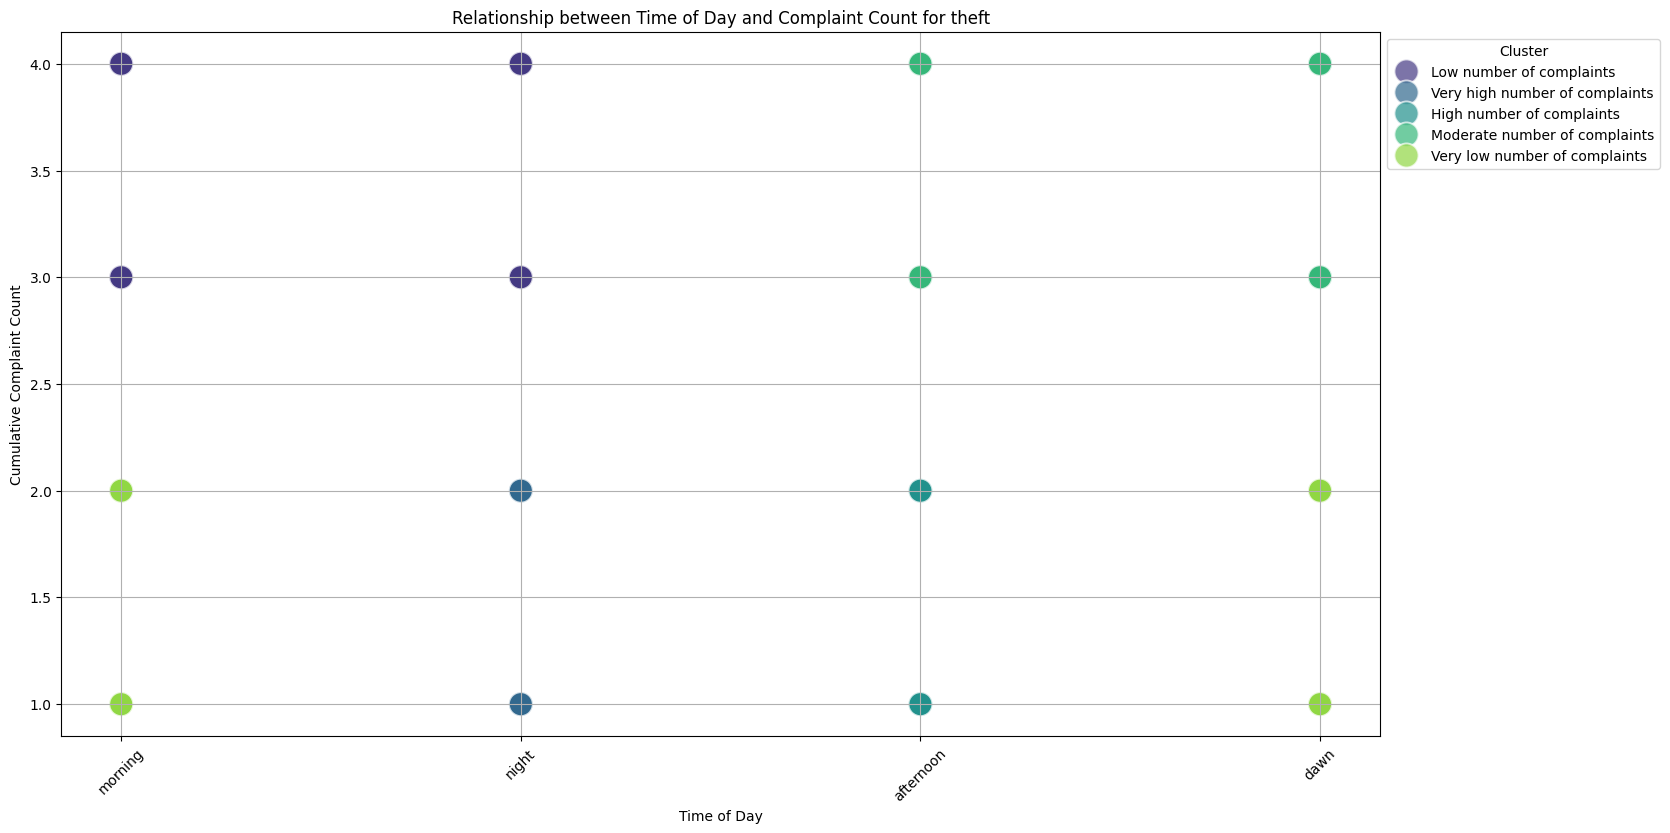

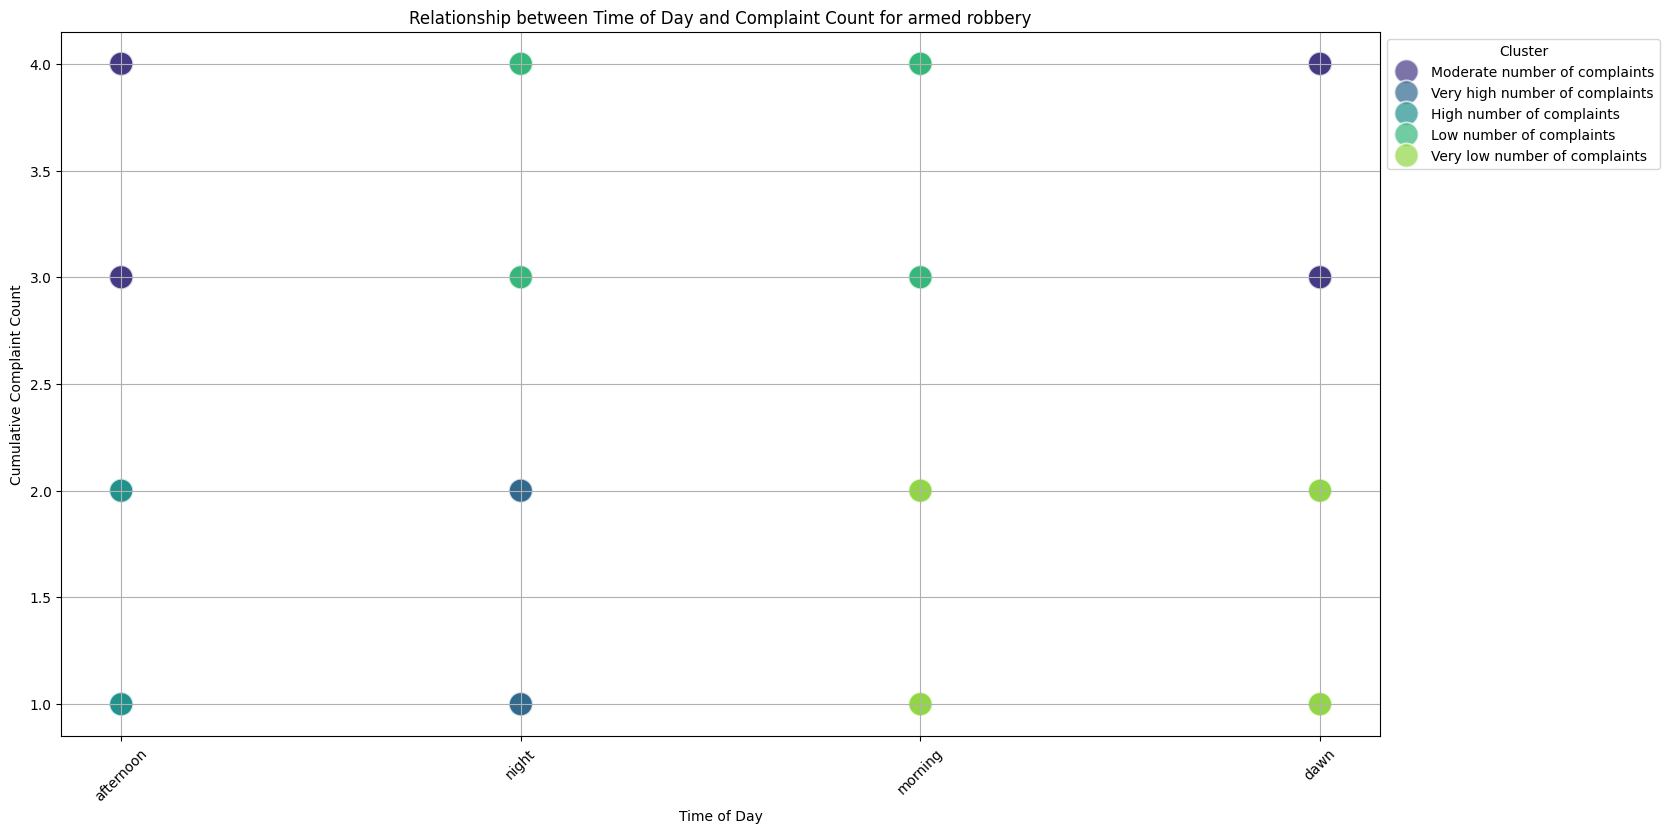

In [22]:
df = pd.read_csv('csv/complaints_normalized.csv')

df = df[(df['crime_type'] != 'N/A') & 
        (df['complaints_count'] != 0) &
        (df['time_period'] != 'N/A')]

le = LabelEncoder()
df['time_encoded'] = le.fit_transform(df['time_period'])

X = df[['time_encoded', 'complaints_count']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

cluster_labels = {
    0: 'Low number of complaints',
    1: 'High number of complaints',
    2: 'Moderate number of complaints',
    3: 'Very high number of complaints',
    4: 'Very low number of complaints'
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

crime_types = df['crime_type'].dropna().unique()

for crime_type in crime_types:
    plt.figure(figsize=(14, 8))
    df_crime_type = df[df['crime_type'] == crime_type]
    
    sns.scatterplot(data=df_crime_type, x='time_period', y='complaints_count', hue='cluster_label', palette='viridis', alpha=0.7, s=300)
    plt.xlabel('Time of Day')
    plt.ylabel('Cumulative Complaint Count')
    plt.title(f'Relationship between Time of Day and Complaint Count for {crime_type}')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()